<img src="https://images.sympla.com.br/5d7a432087b52.png" />

<h1 style="text-align: center; color: gray;">Desafio técnico - Cientista de Dados</h1>

-------------------------------------------------------

### Este é arquivo do tipo "notebook". Saiba abaixo como utilizá-lo

Este arquivo é de um padrão conhecido como "notebook', produzido em um ambiente chamado Jupyter Notebook. Entre as várias facilidades que apresenta, ele permite que pessoas que não têm domínio sobre programação possam ler um projeto de Ciência de Dados e compreender o caminho feito pelo cientista do início até suas conclusões. 

Isso é feito com uma combinação de códigos em Python (e outras linguagens paralelas, como HTML) alternados por textos comuns para que o leitor vá acompanhando o passo a passo. Neste projeto há títulos para sessões e comentários do que está sendo feito a cada etapa, cada um com sua própria formatação. Exemplos dessa aplicação você vê abaixo.

<h1 style="text-align: center; color: #0C29D0;">Este é um título para marcar início de sessões.</h1>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Este é um comentário do tipo 1, que poderá ser inserido antes e depois de blocos de código para informar o leitor do que está sendo feito por meio deles.</p>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Este é um comentário do tipo 2, que será geralmente inserido após títulos e gráficos, ou para comentários secundários. Neste caso usaremos este comentário para explicar que <strong>a linha abaixo é código Python.</strong></p>

In [1]:
print("Estas duas linhas são código em Python. A de cima é o comando feito, e a de baixo é o que retorna desse comando.")

Estas duas linhas são código em Python. A de cima é o comando feito, e a de baixo é o que retorna desse comando.


<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;">Este é um box de conclusões. Ele será utilizado ao fim de cada sessão para descrever os resultados encontrados para aquele requisito.</p>

<br>
Este comentário sem formatação é do tipo 3, que será usado em situações específicas, por exemplo, para exibição de listas, como as que apresentaremos logo abaixo, na Introdução ao projeto.

-------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Introdução</h1>

#### Neste projeto iremos explorar um conjunto de 10 datasets fornecido pelo Olist, com o objetivo de extrair deles insights, respostas, forecasts e outros requisitos, conforme lista abaixo:

* Análise textual dos clientes que deixaram comentários sobre suas compras
* Alguns clientes não escreveram um comentário. Mas por que eles estão satisfeitos?
* Com as informações da data de compra, prever vendas futuras, realizando Feature Engineering.
* Focando na logística, encontrar maneiras de otimizar os tempos de entrega. Testar a hipótese levantada.
* Verificar diferenças no padrão de consumo por regiões.
* Levantar as categorias de produtos mais propensas à insatisfação do cliente.
* Indicar um modelo para precificar os produtos do catálogo

#### Os datasets que vamos explorar estão disponíveis para download no github (https://github.com/olist/work-at-olist-data), em arquivos de formato csv. São eles:

* olist_customers_dataset.csv
* olist_geolocation_dataset.csv
* olist_order_items_dataset.csv
* olist_order_payments_dataset.csv
* olist_order_reviews_dataset.csv
* olist_orders_dataset.csv
* olist_products_dataset.csv
* olist_sellers_dataset.csv
* product_category_name_translation.csv




-------------------------------------------------------

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos iniciar o trabalho importando abaixo as bibliotecas necessárias para cumprir os requisitos apresentados.</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from scipy.stats import pearsonr
import seaborn as sns
import random
import re
from sklearn import preprocessing
import operator
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = 18, 5
pd.set_option('display.max_colwidth', 50)

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">A seguir carregamos os arquivos csv em variáveis de formato DataFrame - o padrão para trabalhar dados com a biblioteca Pandas. A cada arquivo carregado, nós exibiremos as 5 primeiras linhas desses datasets para exploração inicial com o método "head", e também para verificar se não houve nenhum erro de codificação ou de outro tipo.</p>

In [3]:
customers = pd.read_csv('datasets/olist_customers_dataset.csv')

In [4]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [5]:
geoloc = pd.read_csv('datasets/olist_geolocation_dataset.csv')

In [6]:
geoloc.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [7]:
order_items = pd.read_csv('datasets/olist_order_items_dataset.csv')

In [8]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [9]:
order_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv')

In [10]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [11]:
order_reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv')

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Parece que esse dataset tem colunas com dados inconsistentes, ou preenchidas com dados que não parecem fazer sentido no todo. Vamos verificar a composição desse dataset para conhecê-lo melhor.</p>

In [12]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10  \
0     2018-01-18 21:46:59        NaN        NaN        NaN         NaN   
1     2018-03-11 03:05:13        NaN        NaN        NaN         NaN   
2     2018-02-18 14:36:24        NaN        NaN        NaN         NaN   
3     2017-04-21 22:02:06        NaN        NaN        NaN         NaN   
4     2018-03-02 10:26:53        NaN        NaN        NaN         NaN   

  Unnamed: 11 Unnamed: 12  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN

In [13]:
order_reviews[['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12']].describe()

Unnamed: 7           Unnamed: 8      Unnamed: 9  \
count                    60                    9               2   
unique                   59                    9               2   
top     2018-08-05 02:26:50  2018-03-11 18:49:33   e p minha tia   
freq                      2                    1               1   

                                              Unnamed: 10  \
count                                                   1   
unique                                                  1   
top      mto confortável e quente. Entregue antes do p...   
freq                                                    1   

                Unnamed: 11          Unnamed: 12  
count                     1                    1  
unique                    1                    1  
top     2018-03-06 00:00:00  2018-03-07 12:21:13  
freq                      1                    1

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Chama atenção aqui a baixa quantidade de valores únicos (que não se repetem) nessas colunas que vão de Unnamed7 a Unnamed12 (o valor *unique*, descrito na segunda linha da tabela acima). Quando há poucos valores únicos, há muitos valores repetidos, e pelas 5 primeiras linhas desse dataset vemos que essas colunas provavelmente estão populadas com valores nulos.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos verificar as oitenta primeiras linhas da coluna "Unnamed 7" (a que contém mais valores únicos), e ver quantos valores únicos esse recorte tem.</p>

In [14]:
order_reviews['Unnamed: 7'].iloc[0:80].unique()

array([nan], dtype=object)

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">A coluna analisada tem valores nulos nas suas 80 primeiras linhas. Assim, para termos um dataset mais limpo, justifica-se simplesmente remover essa e outras colunas similares (as Unnmaed de 7 a 12). A remoção nós faremos abaixo.</p>

In [15]:
order_reviews = order_reviews.drop(order_reviews.columns[7:13], axis=1)

In [16]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">E continuamos a carregar os datasets.</p>

In [17]:
orders = pd.read_csv('datasets/olist_orders_dataset.csv')

In [18]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [19]:
products = pd.read_csv('datasets/olist_products_dataset.csv')

In [20]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [21]:
sellers = pd.read_csv('datasets/olist_sellers_dataset.csv')

In [22]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [23]:
product_category_name_translation = pd.read_csv('datasets/product_category_name_translation.csv')

In [24]:
product_category_name_translation

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Este dataset "product_category_name_translation" não contém informações relevantes à nossa análise, então removeremos a sua variável para usarmos menos memória.</p>

In [25]:
del product_category_name_translation

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Carregados e conhecidos os datasets, vamos começar o trabalho em si.</p>

-------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Análise textual dos clientes que deixaram comentários sobre suas compras</h1>


<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Ao invés de apresentarmos números para cumprir esse requisito, vamos usar uma <strong>nuvem de palavras</strong>, que será capaz de nos ajudar a compreender de maneira bem mais visual os termos mais comuns utilizados pelos usuários do Olist em seus reviews.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos analisar as 10 primeiras linha do dataset que contém os reviews para conhecermos um recorte da sua composição.</p>

In [26]:
order_reviews.head(10)

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
5  15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6  07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
7  7c6400515c67679fbee952a7525281ef  c31a859e34e3adac22f376954e19b39d   
8  a3f6f7f6f433de0aefbb97da197c554c  9c214ac970e84273583ab523dfafd09b   
9  8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   
5             1                  NaN   
6             5                  NaN   
7             5                  NaN   
8             5                  NaN   
9             4            recomendo   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
5                                                NaN  2018-04-13 00:00:00   
6                                                NaN  2017-07-16 00:00:00   
7                                                NaN  2018-08-14 00:00:00   
8                                                NaN  2017-05-17 00:00:00   
9  aparelho eficiente. no site a marca do aparelh...  2018-05-22 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53  
5     2018-04-16 00:39:37  
6     2017-07-18 19:30:34  
7     2018-08-14 21:36:06  
8     2017-05-18 12:05:37  
9     2018-05-23 16:45:47

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Já de início é possível perceber que há uma quantidade de valores nulos nessa coluna, o que poderá atrapalhar a criação de uma nuvem de palavras. Vamos verificar a aparição de valores nulos.</p>

In [27]:
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58246
review_creation_date           9
review_answer_timestamp        0
dtype: int64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Das 10.000 entradas que há neste dataset, 88.285 são nulas na coluna *review_comment_title* e 58.246 são nulas na coluna *review_comment_message*. Para termos uma nuvem que forneça algum insight, vai ser preciso criar um novo dataset a partir desse, mas sem essas linhas que contém valores nulos.</p>

In [28]:
order_reviews_not_null = order_reviews.dropna()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Criado o novo dataset, vamos verificar quantos valores nulos existem na coluna review_comment_title e na review_comment_message</p>

In [29]:
order_reviews_not_null['review_comment_title'].isnull().sum()

0

In [30]:
order_reviews_not_null['review_comment_message'].isnull().sum()

0

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Ok, agora podemos seguir com a nuvem de palavras. Vamos tentar construir uma nuvem com os reviews e verificar se é possível ter um bom retorno do que os clientes estão dizendo.</p>

In [31]:
mensagens = order_reviews_not_null['review_comment_message'].str.cat(sep=' ')
mensagens = mensagens.replace('que', '').replace('de', '').replace('porém', '').replace('para', ' ').replace('por', '').replace('uma', '').replace('pois', '').replace('um', '').replace('ma', '')

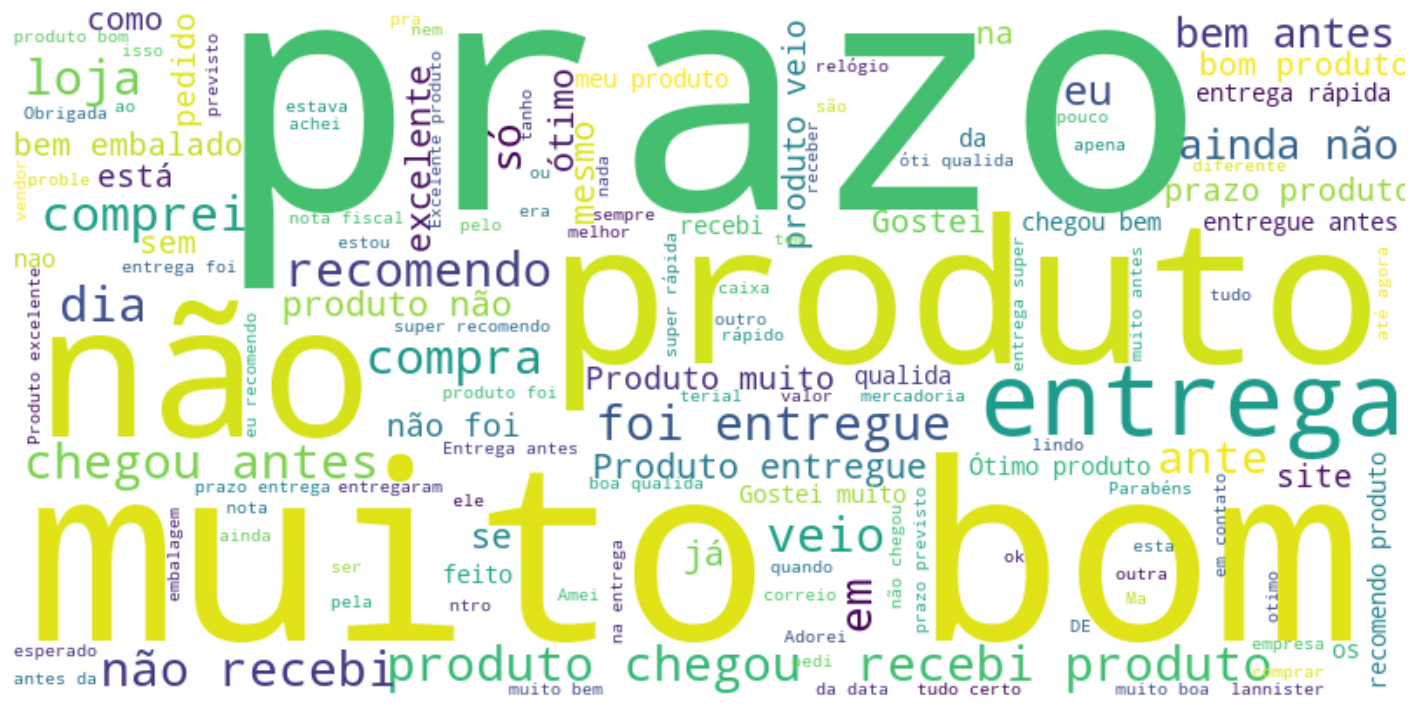

In [32]:
wordcloud = WordCloud(background_color='white', scale=2).generate(mensagens)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">A nuvem feita com os reviews apresentou os termos "prazo" e "muito bom" como bastante relevantes no universo dos clientes que deixaram comentários. A aparição frequente de termos relacionados como "Entrega", "chegou antes", "bem antes", "entrega antes", "entrega rápida" e "recomendo" em tamanhos relevantes na nuvem nos leva a crer que ao menos numa análise preliminar há um certo grau de satisfação dos clientes com as entregas feitas a partir do Olist.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Para entender o que as pessoas estão falando sobre <strong>prazo</strong>, vamos dar uma rápida olhada nos reviews que contêm essa palavra.</p>

In [33]:
order_reviews_not_null[order_reviews_not_null['review_comment_message'].str.contains('prazo')]['review_comment_message']

15       Vendedor confiável, produto ok e entrega antes...
34       Recebi exatamente o que esperava. As demais en...
191      chegou dentro do prazo e o produto é de excele...
258      Entregue dentro do prazo, e com bom período de...
282      Produto bom veio no dentro do prazo chegou em ...
                               ...                        
99828    Muito bom.Produto entregue dentro do prazo e c...
99878           Produto entregue antes do prazo. Recomendo
99892    Eu recebi o produto no prazo porém já veio lig...
99934                              Super antes do prazo!!!
99952    Veio tudo certinho, lacradinho, dentro do praz...
Name: review_comment_message, Length: 1968, dtype: object

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Pela amostra, parece realmente que os clientes que falam sobre <strong>prazo</strong> estão satisfeitos com suas compras. Vamos verificar a pontuação que esses clientes em específico deram às suas transações.

In [34]:
prazo_pontos = order_reviews_not_null[order_reviews_not_null['review_comment_message'].str.contains('prazo')]['review_score'].value_counts()

Text(0, 0.5, 'Pessoas que usaram o termo "prazo"')

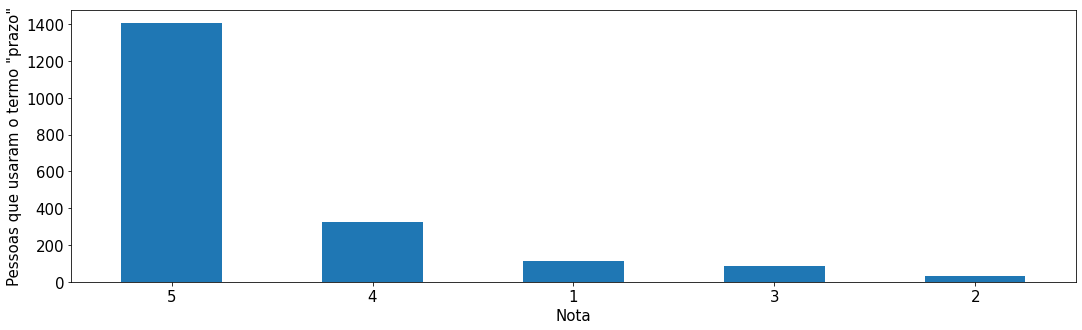

In [35]:
graph_prazo_pontos = prazo_pontos.plot(kind='bar', rot=0)
graph_prazo_pontos.set_xlabel('Nota')
graph_prazo_pontos.set_ylabel('Pessoas que usaram o termo "prazo"')

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Pela amostra, não há dúvida. No período analisado, os clientes que comentaram sobre prazos ficaram bastante satisfeitos com as entregas feitas a partir do Olist, observando que por volta de <strong>1.400</strong> deles deram nota 5/5 para sua transação.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos agora verificar os títulos dos reviews</p>

In [36]:
titulos = order_reviews_not_null['review_comment_title'].str.cat(sep=' ')

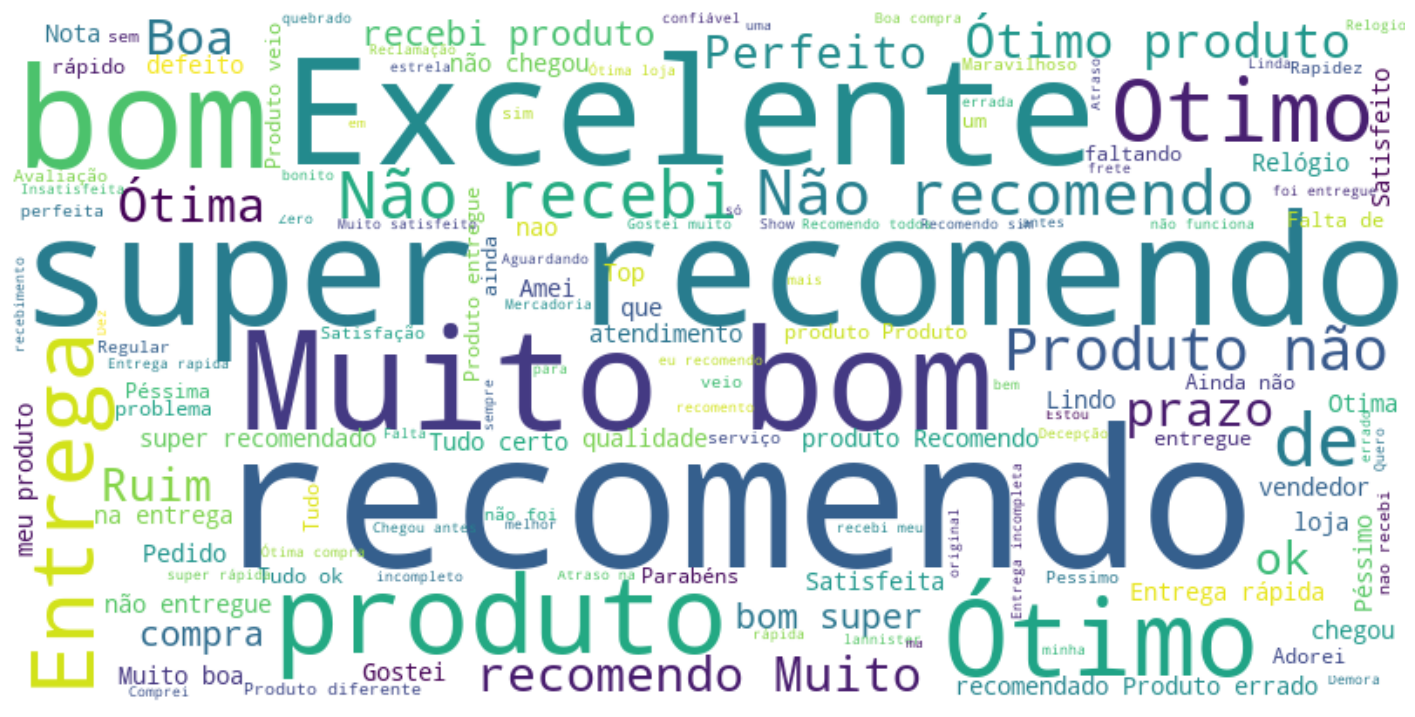

In [37]:
wordcloud = WordCloud(background_color="white", scale=2).generate(titulos)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Com uma grande quantidade de termos positivos, a nuvem produzida com os títulos dos reviews confirma a satisfação dos clientes observada nas mensagens dos reviews.</p>

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;">Os comentários deixados pelos clientes do Olist, tanto nos reviews quanto nos títulos, indicam que eles estão satisfeitos. Colateralmente, descobrimos também que a velocidade na entrega é um dos maiores fatores contribuindo para essa satisfação.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Já que chegamos a uma conclusão nesse requisito, vamos apagar essas variáveis para que não continuem a ocupar espaço na memória.</p>

In [38]:
del titulos
del wordcloud
del graph_prazo_pontos
del prazo_pontos
del order_reviews_not_null
del mensagens

------------------------------------------------------------------------------------

 <h1 style="text-align: center; color: #0C29D0;"> Alguns clientes não escreveram um comentário. <br> Mas por que eles estão satisfeitos?</h1>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Para responder a essa pergunta, vamos voltar ao dataset de reviews original e analisar como os clientes que não deixaram comentário sobre sua compra avaliaram sua transação.

In [39]:
order_reviews[order_reviews['review_comment_message'].isnull()]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
5      15197aa66ff4d0650b5434f1b46cda19  b18dcdf73be66366873cd26c5724d1dc   
6      07f9bee5d1b850860defd761afa7ff16  e48aa0d2dcec3a2e87348811bcfdf22b   
...                                 ...                               ...   
99992  c6b270c61f67c9f7cb07d84ea8aeaf8b  48f7ee67313eda32bfcf5b9c1dd9522d   
99993  af2dc0519de6e0720ef0c74292fb4114  d699c734a0b1c8111f2272a3f36d398c   
99994  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99995  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99997  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   

       review_score review_comment_title review_comment_message  \
0                 4                  NaN                    NaN   
1                 5                  NaN                    NaN   
2                 5                  NaN                    NaN   
5                 1                  NaN                    NaN   
6                 5                  NaN                    NaN   
...             ...                  ...                    ...   
99992             5                  NaN                    NaN   
99993             5                  NaN                    NaN   
99994             5                  NaN                    NaN   
99995             5                  NaN                    NaN   
99997             4                  NaN                    NaN   

      review_creation_date review_answer_timestamp  
0      2018-01-18 00:00:00     2018-01-18 21:46:59  
1      2018-03-10 00:00:00     2018-03-11 03:05:13  
2      2018-02-17 00:00:00     2018-02-18 14:36:24  
5      2018-04-13 00:00:00     2018-04-16 00:39:37  
6      2017-07-16 00:00:00     2017-07-18 19:30:34  
...                    ...                     ...  
99992  2017-12-13 00:00:00     2017-12-14 11:09:36  
99993  2018-04-27 00:00:00     2018-04-30 01:18:57  
99994  2018-07-07 00:00:00     2018-07-14 17:18:30  
99995  2017-12-09 00:00:00     2017-12-11 20:06:42  
99997  2018-07-01 00:00:00     2018-07-02 12:59:13  

[58246 rows x 7 columns]

In [40]:
sem_coment = order_reviews[order_reviews['review_comment_message'].isnull()]

Text(0, 0.5, 'Número de clientes')

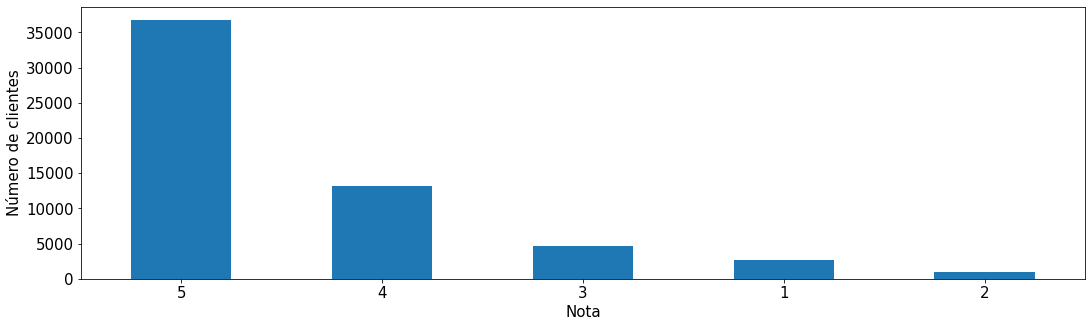

In [41]:
graph_sem_coment = sem_coment['review_score'].value_counts().plot(kind='bar', rot=0)
graph_sem_coment.set_xlabel('Nota')
graph_sem_coment.set_ylabel('Número de clientes')

In [42]:
del graph_sem_coment

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Com mais de 35.000 clientes dando nota 5 para suas transações, aparentemente, esses estão mesmo satisfeitos. Vamos saber mais sobre esses clientes que não deixaram review, começando pela análise dos produtos que compraram.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">A partir da tabela em que estamos (de reviews) não é possível obter diretamente informações sobre itens comprados, então vai ser necessário fundir esta tabela com outras, seguindo o esquema do banco de dados abaixo disponibilizado pela equipe Olist. Faremos fusão com os dois datasets relacionados a produtos, que são "olist_order_items_dataset" e "olist_products_dataset".</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Mas para chegar lá, se estamos partindo da tabela "olist_order_reviews_dataset" precisaremos passar antes pela tabela "olist_orders_dataset".</p>

<img src="https://raw.githubusercontent.com/olist/work-at-olist-data/master/images/schema.png" style="max-width: 80%;" text-align="center">

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos continuar as fusões.</p>

In [43]:
orders['order_id'] = pd.Series(orders['order_id'], dtype='string')

In [44]:
orders['order_id'].head()

0    e481f51cbdc54678b7cc49136f2d6af7
1    53cdb2fc8bc7dce0b6741e2150273451
2    47770eb9100c2d0c44946d9cf07ec65d
3    949d5b44dbf5de918fe9c16f97b45f8a
4    ad21c59c0840e6cb83a9ceb5573f8159
Name: order_id, dtype: string

In [45]:
sem_coment['order_id'] = pd.Series(sem_coment['order_id'], dtype='string')

<ipython-input-45-d52840de3a57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sem_coment['order_id'] = pd.Series(sem_coment['order_id'], dtype='string')


In [46]:
sem_coment['order_id'].head()

0    73fc7af87114b39712e6da79b0a377eb
1    a548910a1c6147796b98fdf73dbeba33
2    f9e4b658b201a9f2ecdecbb34bed034b
5    b18dcdf73be66366873cd26c5724d1dc
6    e48aa0d2dcec3a2e87348811bcfdf22b
Name: order_id, dtype: string

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">E agora vamos fundir esses dois datasets.</p>

In [47]:
sem_coment_full = sem_coment.merge(orders, how='inner', on='order_id' )

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Datasets fundidos, vamos partir para a fusão com os outros especificamente relacionados a itens: "olist_order_items_dataset" e "olist_products_dataset".</p>

In [48]:
sem_coment_full = sem_coment_full.merge(order_items, how='inner', on='order_id')

In [49]:
sem_coment_full = sem_coment_full.merge(products, how='inner', on='product_id')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora vamos verificar o estado do nosso dataset completo, com dados de reviews, dados de pedidos e dados de produtos:</p>

In [50]:
sem_coment_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64729 entries, 0 to 64728
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   review_id                      64729 non-null  object 
 1   order_id                       64729 non-null  object 
 2   review_score                   64729 non-null  int64  
 3   review_comment_title           1901 non-null   object 
 4   review_comment_message         0 non-null      object 
 5   review_creation_date           64729 non-null  object 
 6   review_answer_timestamp        64729 non-null  object 
 7   customer_id                    64729 non-null  object 
 8   order_status                   64729 non-null  object 
 9   order_purchase_timestamp       64729 non-null  object 
 10  order_approved_at              64722 non-null  object 
 11  order_delivered_carrier_date   64334 non-null  object 
 12  order_delivered_customer_date  63874 non-null 

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Temos 17 colunas e 64.729 entradas. Sem erros nas fusões, está tudo aí pelo visto. Checaremos rapidamente as categorias de produtos mais compradas.</p>

Text(0, 0.5, 'Quantidade de produtos comprados')

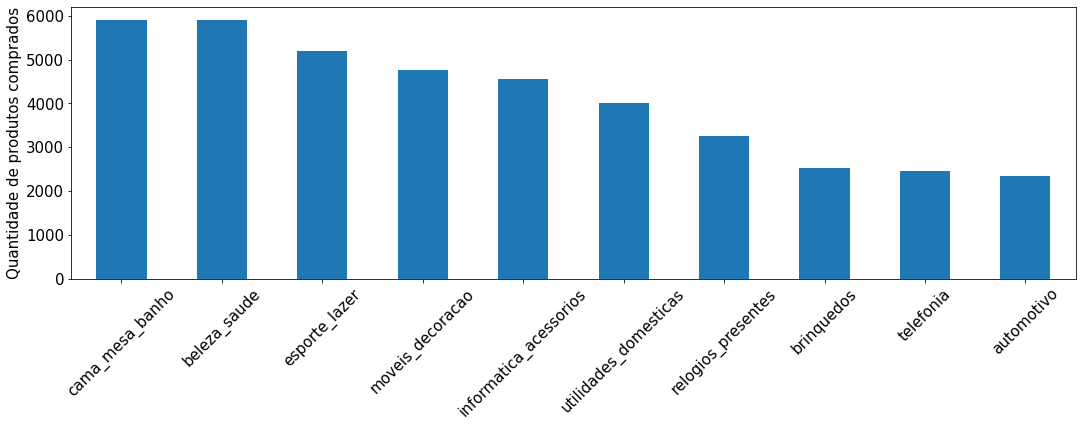

In [51]:
sem_coment_full['product_category_name'].value_counts().head(10).plot(kind='bar', rot=45)
plt.ylabel('Quantidade de produtos comprados')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">E agora vamos conhecer alguns sumários estatísticos sobre como esses clientes gastaram nas 4 primeiras categorias. Os que nos interessam são <strong>média gasta por esses clientes em cada categoria</strong> (mostrada nas tabelas abaixo no item "mean) e o <strong>quartil 50%</strong>, que expressa o gasto máximo de metade dos compradores nessas categorias.</p>

**Cama, mesa e banho**

In [52]:
sem_coment_full[sem_coment_full['product_category_name'] == 'cama_mesa_banho']['price'].describe()

count    5895.000000
mean       91.526960
std        84.037143
min         6.990000
25%        45.950000
50%        74.900000
75%       114.900000
max      1999.980000
Name: price, dtype: float64

**Beleza e Saúde**

In [53]:
sem_coment_full[sem_coment_full['product_category_name'] == 'beleza_saude']['price'].describe()

count    5894.000000
mean      130.745519
std       179.275132
min         2.200000
25%        39.900000
50%        79.900000
75%       131.187500
max      3124.000000
Name: price, dtype: float64

**Esporte e lazer**

In [54]:
sem_coment_full[sem_coment_full['product_category_name'] == 'esporte_lazer']['price'].describe()

count    5202.000000
mean      111.651465
std       144.985408
min         4.500000
25%        43.922500
50%        79.000000
75%       133.000000
max      4059.000000
Name: price, dtype: float64

**Móveis e decoração**

In [55]:
sem_coment_full[sem_coment_full['product_category_name'] == 'moveis_decoracao']['price'].describe()

count    4753.000000
mean       87.573457
std        89.410970
min         4.900000
25%        39.900000
50%        67.000000
75%        99.900000
max      1899.000000
Name: price, dtype: float64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Nada realmente saltou aos olhos aqui. Vamos verificar os gastos de clientes no geral para sabermos se eles se diferenciam deste segmento que não deixou mensagem.</p>

In [56]:
gastos_geral = order_items.merge(products, on='product_id', how='inner')

In [57]:
gastos_geral['price'].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [58]:
gastos_geral[gastos_geral['product_category_name'] == 'cama_mesa_banho']['price'].describe()

count    11115.000000
mean        93.296327
std         82.128028
min          6.990000
25%         47.990000
50%         79.050000
75%        115.000000
max       1999.980000
Name: price, dtype: float64

In [59]:
gastos_geral['product_category_name'].value_counts()

cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: product_category_name, Length: 73, dtype: int64

In [60]:
gastos_geral = gastos_geral.merge(order_reviews, on='order_id', how='inner')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">As características das compras dos clientes que não deixaram review se assemelham muito ao conjunto total dos clientes. Vamos checar agora apenas os que deixaram review para vermos se há alguma diferença. Novas fusões vão ser necessárias.</p>

In [61]:
com_coment_full = gastos_geral[gastos_geral['review_comment_message'].notnull()]

In [62]:
com_coment_full = com_coment_full.merge(orders, on='order_id', how='inner')

In [63]:
com_coment_full = com_coment_full.merge(customers, on='customer_id', how='inner')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Feitas as fusões necessárias, agora é verficar as categorias mais compradas pelo conjunto dos clientes que deixaram reviews.</p>

In [64]:
com_coment_full['product_category_name'].value_counts()

cama_mesa_banho                  5377
beleza_saude                     3834
moveis_decoracao                 3663
esporte_lazer                    3499
informatica_acessorios           3336
                                 ... 
la_cuisine                          7
cds_dvds_musicais                   5
pc_gamer                            2
seguros_e_servicos                  2
fashion_roupa_infanto_juvenil       1
Name: product_category_name, Length: 73, dtype: int64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Realmente, as categorias se assemelham bastante aos outros dois conjuntos, o dos clientes que não deixaram review, e o dos clientes em geral. Vamos verificar as notas que deram às suas transações os clientes que deixaram review.</p>

Text(0, 0.5, 'Número de clientes')

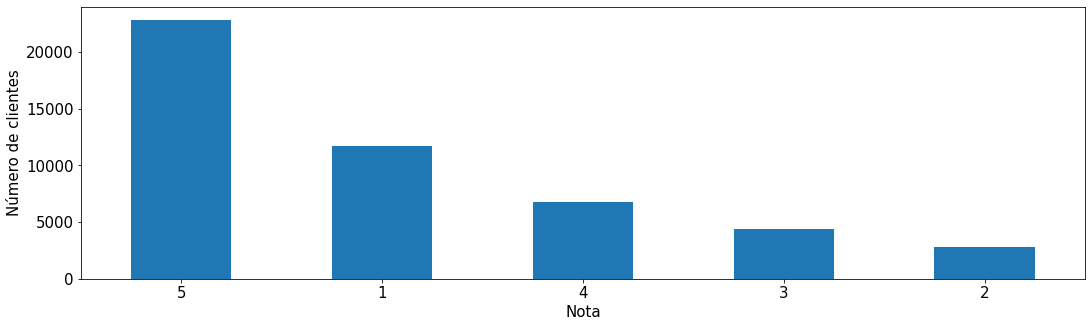

In [65]:
com_coment_full_graph = com_coment_full['review_score'].value_counts().plot(kind='bar', rot=0)
com_coment_full_graph.set_xlabel('Nota')
com_coment_full_graph.set_ylabel('Número de clientes')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Além das categorias, as notas também seguem o mesmo padrão dos outros conjuntos. Vamos verificar os gastos.</p>

In [66]:
com_coment_full['price'].describe()

count    48593.000000
mean       125.093181
std        194.267084
min          0.850000
25%         39.990000
50%         76.900000
75%        138.900000
max       6735.000000
Name: price, dtype: float64

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;">Os clientes que não deixaram review reproduzem praticamente os mesmos comportamentos de consumo do público geral nos produtos comprados e nos valores gastos, motivo provável pelo qual também reproduzem os mesmos níveis de satisfação.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Conforme fizemos antes, agora vamos remover as variáveis usadas para que não ocupem espaço na memória.</p>

In [67]:
del sem_coment_full
del sem_coment
del gastos_geral
del com_coment_full_graph

-----------------------------------------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Com as informações da data de compra, prever vendas futuras</h1>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Para cumprir este requisito nós iremos apontar a tendência geral das vendas para o futuro utilizando a técnica de regressão linear. Por meio desse modelo criaremos uma linha de tendência que será projetada dois anos à frente do último dia útil do dataset.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos fundir dois datasets que contém informações importantes sobre vendas, preços e datas. São eles: "olist_orders_dataset" e "olist_order_items_dataset"</p>

In [68]:
compras = orders.merge(order_items, on='order_id', how='inner')

In [69]:
compras.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00              1   
3           2017-12-15 00:00:00              1   
4           2018-02-26 00:00:00              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

   shipping_limit_date   price  freight_value  
0  2017-10-06 11:07:15   29.99           8.72  
1  2018-07-30 03:24:27  118.70          22.76  
2  2018-08-13 08:55:23  159.90          19.22  
3  2017-11-23 19:45:59   45.00          27.20  
4  2018-02-19 20:31:37   19.90           8.72

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">O novo dataset chamado "compras" foi criado com a fusão dos dois e está funcionando corretamente. Vamos agora conhecer a tendência geral das vendas por mês. Veremos por alto a média e soma total das vendas por esse recorte. Mas antes, vamos limpar a colunda de data de pedido aprovado, para deixarmos nela só meses e anos.</p>

In [70]:
compras['order_approved_at'] = compras['order_approved_at'].str.replace('-\d\d \d\d:\d\d:\d\d', '')

In [71]:
compras['order_approved_at'] = pd.to_datetime(compras['order_approved_at'])

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">A coluna está num formato em que é possível aplicar operações no Python. Agora iremos plotar a soma de vendas por mês de cada ano.</p>

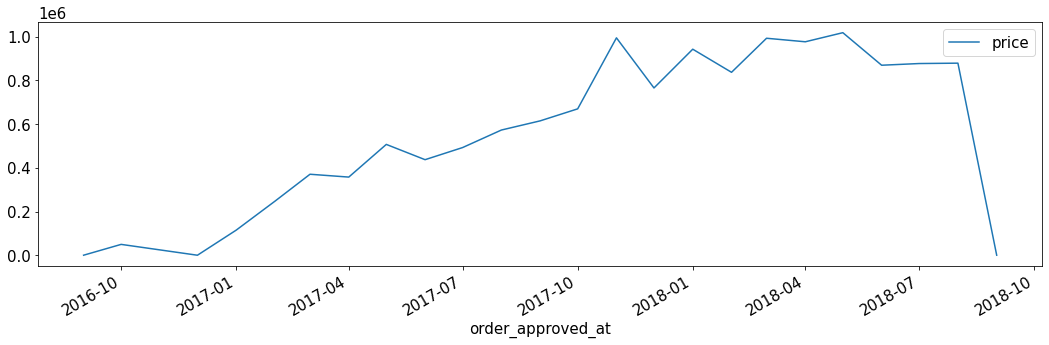

In [72]:
pd.pivot_table(compras,index='order_approved_at', values='price', aggfunc='sum').plot()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">É bastante estranho que não haja nenhuma venda em dois períodos: entre dezembro de 2016 e janeiro de 2017, e de agosto de 2018 para frente. Vamos ver como se comportam as vendas especificamente nos três meses que antecedem a queda no final da série.</p>

In [73]:
periodo_de_queda = compras[(compras['order_approved_at'] < '2018-10') & (compras['order_approved_at'] > '2018-07')]

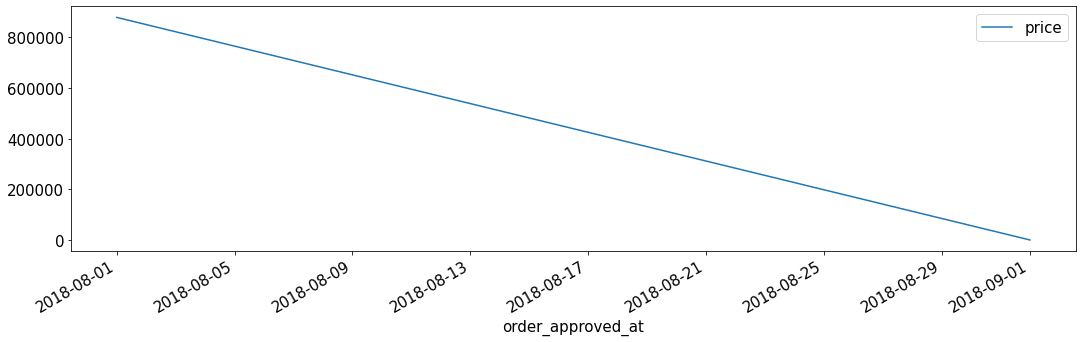

In [74]:
pd.pivot_table(periodo_de_queda,index='order_approved_at', values='price', aggfunc='sum').plot()

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Segundo os dados, a soma das vendas foi caindo solidamente, de mais de 800.000 em agosto, até chegar a zero no dia 1º de setembro, se mantendo de forma problemática até o final de dezembro de 2018. Sendo este quadro pouco provável segundo a realidade, a hipótese é de que exista um problema com este dataset, ou com o banco de dados, no início e no fim da série temporal.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Sabendo que essas duas partes dos dados (que marcam o início e o fim da série temporal) não são confiáveis, vamos simplesmente remover esses meses da nossa análise, para evitar criarmos uma estatística distorcida.</p>

In [75]:
compras_clean = compras[(compras['order_approved_at'] >= '2017-01') & (compras['order_approved_at'] < '2018-08-01')]

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">E agora vamos plotar a soma das vendas por mês sem esses períodos.</p>

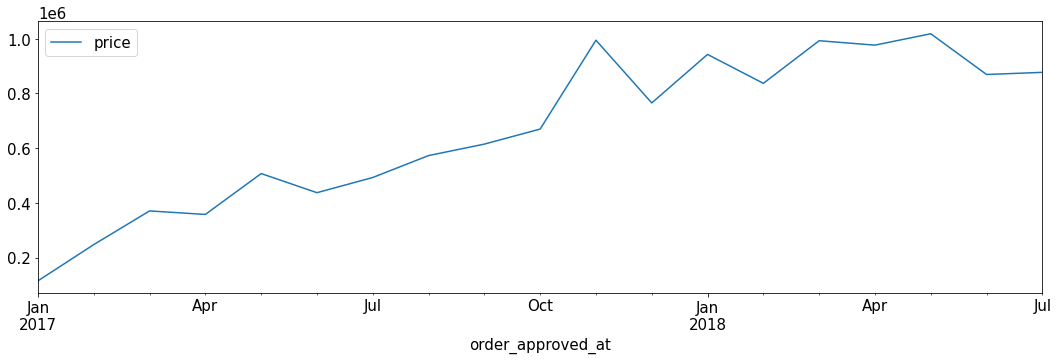

In [76]:
pd.pivot_table(compras_clean,index='order_approved_at', values='price', aggfunc='sum').plot()

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Agora o gráfico da soma das vendas parece muitos mais realista. Já é possível perceber uma tendência.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;"> Na ausência de outras variáveis que impactem sobre as vendas (alteração de preços, verba para anúncios, impressões de anúncios, engajamento etc.), utilizaremos uma linha de tendência simples para projetar as vendas. Vamos aplicar sobre a coluna 'Price' agrupada pela data o recurso de Regressão Linear para saber como seria o restante do ano, entre agosto e setembro de 2018, tomando como hipótese que a tendência se manterá essa que está registrada. O processo se inicia formatando o DataFrame adequadamente.</p>

In [77]:
compras_clean = orders.merge(order_items, on='order_id', how='inner')

In [78]:
compras_clean.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  order_item_id  \
0           2017-10-18 00:00:00              1   
1           2018-08-13 00:00:00              1   
2           2018-09-04 00:00:00              1   
3           2017-12-15 00:00:00              1   
4           2018-02-26 00:00:00              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3  d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4  65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   

   shipping_limit_date   price  freight_value  
0  2017-10-06 11:07:15   29.99           8.72  
1  2018-07-30 03:24:27  118.70          22.76  
2  2018-08-13 08:55:23  159.90          19.22  
3  2017-11-23 19:45:59   45.00          27.20  
4  2018-02-19 20:31:37   19.90           8.72

In [79]:
compras_clean['order_approved_at'] = compras_clean['order_approved_at'].str.replace(' \d\d:\d\d:\d\d', '')

In [80]:
compras_clean['order_approved_at']

0         2017-10-02
1         2018-07-26
2         2018-08-08
3         2017-11-18
4         2018-02-13
             ...    
112645    2018-02-06
112646    2017-08-27
112647    2018-01-08
112648    2018-01-08
112649    2018-03-09
Name: order_approved_at, Length: 112650, dtype: object

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Decidimos utilizar para análise e treinamento do nosso modelo o período de 12 meses entre julho de 2017 e julho de 2018. Esse período é interessante porque ele é capaz de captar a sazonalidade das vendas.</p>

In [81]:
compras_clean = compras_clean[(compras_clean['order_approved_at'] >= '2017-06-01') & (compras_clean['order_approved_at'] < '2018-08-01')]

In [82]:
compras_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92180 entries, 0 to 112649
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       92180 non-null  object 
 1   customer_id                    92180 non-null  object 
 2   order_status                   92180 non-null  object 
 3   order_purchase_timestamp       92180 non-null  object 
 4   order_approved_at              92180 non-null  object 
 5   order_delivered_carrier_date   91361 non-null  object 
 6   order_delivered_customer_date  90365 non-null  object 
 7   order_estimated_delivery_date  92180 non-null  object 
 8   order_item_id                  92180 non-null  int64  
 9   product_id                     92180 non-null  object 
 10  seller_id                      92180 non-null  object 
 11  shipping_limit_date            92180 non-null  object 
 12  price                          92180 non-null

In [83]:
compras_clean['order_approved_at'].head()

0    2017-10-02
1    2018-07-26
3    2017-11-18
4    2018-02-13
5    2017-07-09
Name: order_approved_at, dtype: object

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Contendo 92.041 linhas e as colunas que nos interessam (a data de pagamento, em order_approved_at, e o preço do produto comprado) o DataFrame parece adequado.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;"> O algoritmo de regressão linear não aceita como entrada o formato de data, então teremos que usar o número de dias passados a partir de 01/06/2017 para acompanhar a evolução das vendas. Agora nós iremos inserir uma coluna com esse valor, e depois poderemos fazer previsões utilizando qualquer número de dias depois de 01/06/2017.</p>

In [84]:
compras_clean = compras_clean.groupby(by='order_approved_at').agg('sum')

In [85]:
compras_clean['data_compra'] = compras_clean.index

In [86]:
compras_clean.reset_index(drop=True, inplace=True)

In [87]:
compras_clean['dias'] = compras_clean.index

In [88]:
compras_clean.tail()

order_item_id     price  freight_value data_compra  dias
417            403  39728.44        6674.48  2018-07-27   417
418            239  24614.59        4077.42  2018-07-28   418
419            134  16408.28        2457.96  2018-07-29   419
420            352  40774.14        7112.67  2018-07-30   420
421            477  45954.74        8619.91  2018-07-31   421

In [89]:
compras_clean.describe()

order_item_id          price  freight_value        dias
count     422.000000     422.000000     422.000000  422.000000
mean      262.718009   26216.434242    4386.580000  210.500000
std       143.812753   13411.345191    2334.380416  121.965159
min         4.000000     357.690000      54.310000    0.000000
25%       171.250000   17732.925000    2858.417500  105.250000
50%       230.000000   24112.495000    3963.230000  210.500000
75%       322.750000   32397.600000    5461.637500  315.750000
max      1305.000000  132994.940000   22635.030000  421.000000

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Agora nós temos a coluna "dias" para uso nas nossas previsões.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos agora criar um gráfico do tipo dispersão, para verificar a relação dos dias passados a partir de 01/06/2017, e o valor total em vendas diárias, para acompanharmos sua progressão.</p>

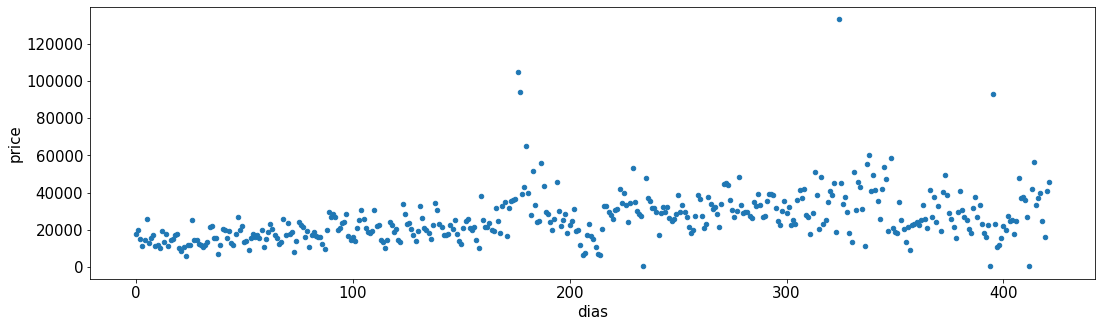

In [90]:
compras_clean.plot(kind='scatter', x='dias', y='price')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos remover os quatro valores acima de 80000, sabendo que eles não representam bem o dataset como um todo.

In [91]:
compras_clean = compras_clean[compras_clean['price'] < 60000]

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Numa rápida olhada é possível perceber uma correlação leve e positiva entre as variáveis dias passados e vendas totais por dia. Isso quer dizer que elas tendem a aumentar juntas.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Como dissemos antes, não temos outras variáveis de real impacto nas vendas, então vamos simplesmente assumir a tendência conforme o tempo passa. Agora, verificamos a força da correlação entre Dias e Vendas em R$ por dia com o recurso da Correlação de Pearson. Se esse resultado estiver acima de 4.0, esssas variáveis têm correlação suficiente para aplicar o modelo.</p>

In [92]:
corr, _ = pearsonr(compras_clean['dias'], compras_clean['price'])

In [93]:
corr

0.4850930516953898

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Tudo certo, a correlação é positiva e moderada, e agora, iremos utilizar o modelo estatístico escolhido em si, Regressão Linear Simples.</p>

In [94]:
X = compras_clean['dias'].values.reshape(-1, 1)
y = compras_clean['price'].values.reshape(-1, 1)

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Como uma boa prática do Machine Learning, nós separamos o nosso dataset em duas porções, uma para treino e uma para teste do modelo. A de treino será usada para a máquina entender os padrões dos dados, e a de teste será usada para comparação futura: a inteligência irá tentar recriar os dados que ficaram reservados nessa porção, e nós poderemos comparar os resultados depois para averiguar sua eficiência.</p>

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [96]:
print(regressor.intercept_)
print(regressor.coef_)

[16557.71475256]
[[41.79916943]]


In [97]:
y_pred = regressor.predict(X_test)

In [98]:
mostrar = pd.DataFrame({'Dados reais': y_test.flatten(), 'Previsao': y_pred.flatten()})

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">E agora vamos comparar os dados previstos pela máquina com os dados reais, que já haviam no nosso dataset, reservados na porção de teste, primeiro em uma tabela.</p>

In [99]:
mostrar

Dados reais      Previsao
0      33109.26  31730.813256
1      34714.44  23663.573556
2      24040.41  26046.126213
3        535.58  33026.587508
4      17695.36  29557.256446
..          ...           ...
79     16036.49  20737.631696
80     15622.85  16850.308939
81     10566.40  17477.296480
82     26094.32  19400.058274
83     41012.49  29933.448971

[84 rows x 2 columns]

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora vamos visualizar esses mesmos dados num gráfico, para compreendermos mais visualmente.

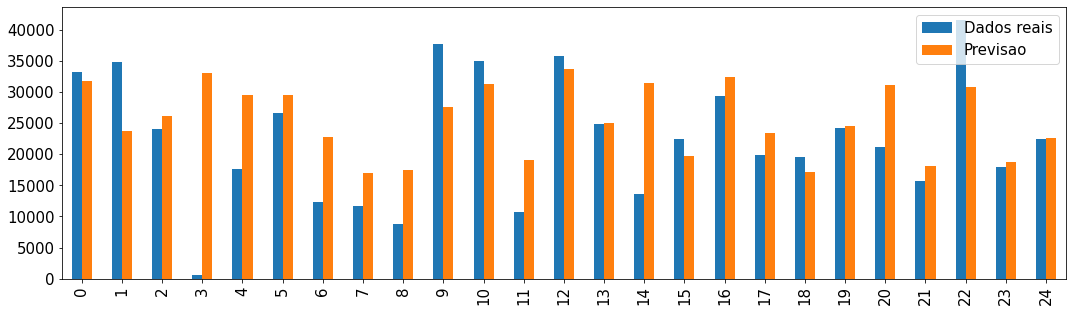

In [100]:
mostrar = mostrar.head(25)
mostrar.plot(kind='bar')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Abaixo temos um gráfico de dispersão, onde cada ponto é um volume de vendas. No eixo X temos o número de dias passados desde janeiro de 2017, e no eixo y temos o volume de vendas por dia em reais. Sobre esse gráfico, temos esta linha vermelha que representa a tendência observada pela máquina. Na prática, quer dizer que a inteligência também percebeu que conforme os dias passam, as vendas diárias tendem a aumentar.</p>

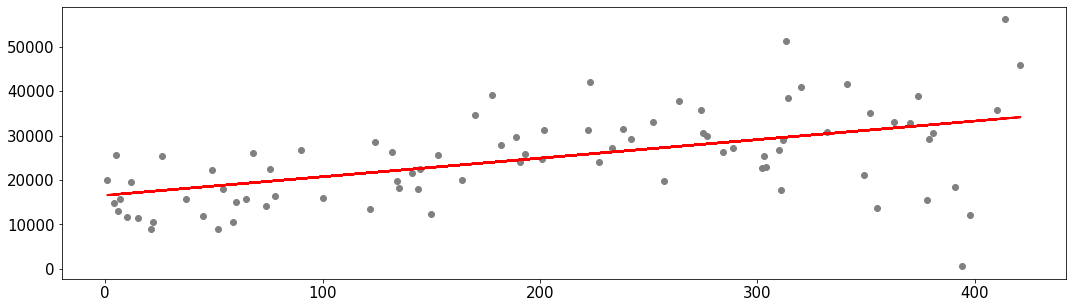

In [101]:
plt.figure()
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora vamos fazer nossa previsão para 01/06/2019, ou seja, 2 anos (720 dias) depois de 01/06/2017. Mas antes, vamos criar o intervalos de dias que se passarão até lá.</p>

In [102]:
futuro = []

inicio = 421
for i in range(730):
    inicio+=1
    futuro.append(inicio)

futuro = pd.DataFrame(futuro)
futuro = np.array(futuro)

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Criados os valores previstos e a lista de dias, agora vamos juntar esses valores em uma nova tabela. Nesta tabela já não utilizaremos o número de dias, mas as datas propriamente ditas.</p>

In [103]:
predicoes = pd.DataFrame(regressor.predict((futuro)))

In [104]:
datelist = pd.date_range(start='2019-06-02', periods=730)
predicoes['data'] = datelist
predicoes.columns = 'vendas', 'data'
predicoes = predicoes[['data', 'vendas']]

In [105]:
predicoes

data        vendas
0   2019-06-02  34196.964253
1   2019-06-03  34238.763422
2   2019-06-04  34280.562591
3   2019-06-05  34322.361761
4   2019-06-06  34364.160930
..         ...           ...
725 2021-05-27  64501.362090
726 2021-05-28  64543.161260
727 2021-05-29  64584.960429
728 2021-05-30  64626.759599
729 2021-05-31  64668.558768

[730 rows x 2 columns]

In [106]:
mostrar

Dados reais      Previsao
0      33109.26  31730.813256
1      34714.44  23663.573556
2      24040.41  26046.126213
3        535.58  33026.587508
4      17695.36  29557.256446
5      26680.90  29515.457276
6      12396.24  22827.590167
7      11721.12  16975.706447
8       8856.99  17435.497311
9      37737.22  27592.695482
10     34986.11  31271.022392
11     10640.82  19023.865749
12     35764.35  33695.374219
13     24782.77  24959.347808
14     13677.59  31396.419901
15     22459.70  19734.451629
16     29321.41  32399.599967
17     19896.31  23412.778539
18     19557.53  17059.304786
19     24116.49  24541.356114
20     21135.77  31145.624884
21     15770.12  18104.284022
22     41533.81  30811.231529
23     17961.96  18814.869902
24     22493.84  22618.594320

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Com o recurso da Regressão Linear poderemos escolher qualquer data (ou conjunto de datas) do intervalo de 2 anos à frente para prever as vendas do Olist, com base na linha de tendência que levantamos.</p>

In [107]:
series = compras_clean[['price']]

In [108]:
predicoes[predicoes['data'] == '2019-08-17']

data        vendas
76 2019-08-17  37373.701129

In [109]:
predicoes[predicoes['data'] > '2018-12-31']['vendas'].sum()

36085915.90250856

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Abaixo verificamos a média de erro da predição.

In [110]:
RMSE = mean_squared_error(y_test, regressor.predict(X_test))**0.5
RMSE

8644.907999290926

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">A média de erro do nosso modelo pode flutuar R$8.644,90 reais para cima ou para baixo em cada ponto gerado, mostrando que talvez esse modelo possa ser melhorado em muito com a adição de outras métricas/variáveis, ou que talvez não seja o melhor preditor para este dataset. Mas de uma forma generalista, a tendência das vendas observada neste dataset está estabelecida.

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;">Em todo o ano de 2019, o Olist teria vendido um total aproximado de <strong>R$ 36.085.915,00</strong> </p>

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;">Segundo a projeção feita sobre os dados deste dataset, no dia 17/08/2019, o Olist teria vendido aproximadamente <strong> R$ 37.373,00 </strong></p>

-----------------------------------------------------------------------------------------

In [111]:
from sklearn.tree import DecisionTreeRegressor

In [112]:
msk = np.random.rand(len(compras_clean)) < 0.8
train = compras_clean[msk]
teste = compras_clean[~msk]

'''

In [11]: df = pd.DataFrame(np.random.randn(100, 2))

In [12]: msk = np.random.rand(len(df)) < 0.8

In [13]: train = df[msk]

In [14]: test = df[~msk]'''

'\n\nIn [11]: df = pd.DataFrame(np.random.randn(100, 2))\n\nIn [12]: msk = np.random.rand(len(df)) < 0.8\n\nIn [13]: train = df[msk]\n\nIn [14]: test = df[~msk]'

In [113]:
X = train['dias'].values.reshape(-1,1)

In [114]:
y = train['price'].values.reshape(-1,1)

In [115]:
vendas_model = DecisionTreeRegressor(random_state=1)

In [116]:
vendas_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [203]:
vendas_model.predict([[4218]])

array([24614.59])

In [198]:
compras_clean.tail()

order_item_id     price  freight_value data_compra  dias
417            403  39728.44        6674.48  2018-07-27   417
418            239  24614.59        4077.42  2018-07-28   418
419            134  16408.28        2457.96  2018-07-29   419
420            352  40774.14        7112.67  2018-07-30   420
421            477  45954.74        8619.91  2018-07-31   421

-----------------------------------------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Focando na logística, encontrar maneiras de otimizar os tempos de entrega. Teste a hipótese levantada.
</h1>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Nosso objetivo aqui é encontrar entregas problemáticas e sugerir soluções para melhorar a experiência do cliente nesse ponto. É natural que este requisito vá exigir que analisemos os dataset relacionados às entregas e suas colunas, então começaremos com esta etapa.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Abaixo criaremos um dataset de nome "entregas", que terá colunas dos datasets: costumers, orders, order_items.</p>

In [118]:
entregas = customers.rename(columns={'customer_zip_code_prefix':'geolocation_zip_code_prefix'})
entregas = entregas[['customer_id', 'geolocation_zip_code_prefix', 'customer_city', 'customer_state']]
entregas = entregas.merge(orders, on='customer_id', how='inner')
entregas = entregas.merge(order_items, on='order_id', how='inner')

In [119]:
entregas = entregas[['customer_id', 'geolocation_zip_code_prefix', 'customer_city', 'customer_state', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'freight_value']]

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Converteremos as colunas que contém informações de data para o formato datetime.</p>

In [120]:
entregas['order_estimated_delivery_date'] = pd.to_datetime(entregas['order_estimated_delivery_date'])
entregas['order_delivered_customer_date'] = pd.to_datetime(entregas['order_delivered_customer_date'])
entregas['order_delivered_carrier_date'] = pd.to_datetime(entregas['order_delivered_carrier_date'])
entregas['order_approved_at'] = pd.to_datetime(entregas['order_approved_at'])

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Notamos que há um bom potencial de obtenção de insights pela comparação das colunas "order_estimated_delivery_date" e "'order_delivered_customer_date", que representam o horário que estava previsto para a chegada do produto no endereço do cliente, e o horário que o produto efetivamente chegou. Então criaremos uma nova coluna chamada "dif_entregaest_x_efetiva" (diferença entre a entrega estimada e a efetiva), e a preencheremos com essa diferença.</p>

In [121]:
entregas['dif_entregaest_x_efetiva'] = entregas['order_estimated_delivery_date'] - entregas['order_delivered_customer_date']

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos eliminar todas as linhas que não tenham registros de datas, para uma análise mais precisa.</p>

In [122]:
entregas = entregas.dropna()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora uma rápida olhada nas entregas cujo prazo efetivo foi maior do que o prazo previsto.</p>

In [123]:
entregas[entregas['dif_entregaest_x_efetiva'] < '0 days']

customer_id  geolocation_zip_code_prefix  \
2       4e7b3e00288586ebd08712fdd0374a03                         1151   
18      9b8ce803689b3562defaad4613ef426f                         5416   
35      b2bed119388167a954382cca36c4777f                        27525   
36      b2bed119388167a954382cca36c4777f                        27525   
67      a905baa530258422594f1b05615bd225                        60140   
...                                  ...                          ...   
112624  b7c889215de76857c7967c1011125d2d                        82410   
112625  b7c889215de76857c7967c1011125d2d                        82410   
112634  0a7db3996b88954c7aa763b5dd621d5b                        52090   
112638  1ed0c832c2dd99570a59260e71768bdf                        37610   
112647  5e28dfe12db7fb50a4b2f691faecea5e                        60115   

       customer_city customer_state   order_approved_at  \
2          sao paulo             SP 2018-05-20 16:19:10   
18         sao paulo             SP 2017-05-13 11:55:16   
35           resende             RJ 2017-06-15 18:43:04   
36           resende             RJ 2017-06-15 18:43:04   
67         fortaleza             CE 2018-03-29 21:35:20   
...              ...            ...                 ...   
112624      curitiba             PR 2018-01-31 15:30:30   
112625      curitiba             PR 2018-01-31 15:30:30   
112634        recife             PE 2018-02-13 18:30:31   
112638   bom repouso             MG 2017-11-14 12:15:25   
112647     fortaleza             CE 2018-04-08 20:30:03   

       order_delivered_carrier_date order_delivered_customer_date  \
2               2018-06-11 14:31:00           2018-06-14 17:58:51   
18              2017-05-15 15:30:02           2017-06-07 12:02:14   
35              2017-06-22 08:11:38           2017-07-07 20:32:47   
36              2017-06-22 08:11:38           2017-07-07 20:32:47   
67              2018-04-12 23:36:29           2018-05-08 16:52:07   
...                             ...                           ...   
112624          2018-02-16 16:28:33           2018-03-16 20:03:53   
112625          2018-02-16 16:28:33           2018-03-16 20:03:53   
112634          2018-02-14 20:22:56           2018-03-29 20:26:42   
112638          2017-11-27 20:44:47           2017-12-19 19:37:33   
112647          2018-04-09 17:52:17           2018-05-09 19:03:15   

       order_estimated_delivery_date  shipping_limit_date  freight_value  \
2                         2018-06-13  2018-06-05 16:19:10          17.79   
18                        2017-05-30  2017-05-19 11:55:16          12.13   
35                        2017-07-07  2017-06-21 18:43:04          16.13   
36                        2017-07-07  2017-06-21 18:43:04          16.14   
67                        2018-04-23  2018-04-04 21:35:20          15.31   
...                              ...                  ...            ...   
112624                    2018-03-13  2018-02-14 15:30:30          30.40   
112625                    2018-03-13  2018-02-14 15:30:30          30.40   
112634                    2018-03-15  2018-02-19 17:30:31          25.66   
112638                    2017-12-12  2017-11-24 12:15:25          31.93   
112647                    2018-05-02  2018-04-12 20:30:03          19.04   

       dif_entregaest_x_efetiva  
2             -2 days +06:01:09  
18            -9 days +11:57:46  
35            -1 days +03:27:13  
36            -1 days +03:27:13  
67           -16 days +07:07:53  
...                         ...  
112624        -4 days +03:56:07  
112625        -4 days +03:56:07  
112634       -15 days +03:33:18  
112638        -8 days +04:22:27  
112647        -8 days +04:56:45  

[8714 rows x 11 columns]

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Temos uma hipótese. Talvez esses atrasos se devam a algum processo na entrega do produto à transportadora? A coluna "order_delivered_carrier_date" pode nos ajudar a verificar isso.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos criar uma nova coluna chamada "horario_despachado", com dados de "order_delivered_carrier_date", mas num formato que possa ser trabalhado com operações matemáticas.</p>

In [124]:
entregas['horario_despachado'] = entregas['order_delivered_carrier_date'].dt.hour
entregas['dif_entregaest_x_efetiva'] = entregas['dif_entregaest_x_efetiva'].astype(str)
entregas['dif_entregaest_x_efetiva'] = entregas['dif_entregaest_x_efetiva'].str.replace(' days.*', '')

In [125]:
entregas['dif_entregaest_x_efetiva'] = entregas['dif_entregaest_x_efetiva'].astype(int)

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora vamos verificar as entregas à transportadora/correios que ocorreram após as 18h.</p>

In [126]:
entregas[entregas['horario_despachado'] > 18]

customer_id  geolocation_zip_code_prefix  \
3       b2b6027bc5c5109e529d4dc6358b12c3                         8775   
5       879864dab9bc3047522c92c82e1212b8                        89254   
8       5adf08e34b2e993982a47070956c5c65                        81560   
10      9fb35e4ed6f0a14a4977cd9aea4042bb                        39400   
13      eabebad39a88bb6f5b52376faec28612                         5704   
...                                  ...                          ...   
112630  5eef6cce1f34954c9e7004332388ccc7                        11045   
112632  c6ece8a5137f3c9c3a3a12302a19a2ac                         1323   
112634  0a7db3996b88954c7aa763b5dd621d5b                        52090   
112638  1ed0c832c2dd99570a59260e71768bdf                        37610   
112649  274fa6071e5e17fe303b9748641082c8                         6703   

          customer_city customer_state   order_approved_at  \
3       mogi das cruzes             SP 2018-03-13 17:29:19   
5        jaragua do sul             SC 2017-09-14 18:25:11   
8              curitiba             PR 2018-01-18 12:56:32   
10        montes claros             MG 2017-11-27 18:01:20   
13            sao paulo             SP 2018-03-07 16:15:30   
...                 ...            ...                 ...   
112630           santos             SP 2018-03-15 03:29:29   
112632        sao paulo             SP 2017-10-20 07:28:14   
112634           recife             PE 2018-02-13 18:30:31   
112638      bom repouso             MG 2017-11-14 12:15:25   
112649            cotia             SP 2017-12-19 18:50:39   

       order_delivered_carrier_date order_delivered_customer_date  \
3               2018-03-27 23:22:42           2018-03-28 16:04:25   
5               2017-09-18 21:27:40           2017-09-28 17:32:43   
8               2018-01-18 23:25:35           2018-01-26 15:17:57   
10              2017-11-28 23:04:41           2017-12-08 22:16:17   
13              2018-03-12 23:02:49           2018-03-15 00:46:30   
...                             ...                           ...   
112630          2018-03-16 23:15:49           2018-03-23 02:47:48   
112632          2017-10-23 19:13:38           2017-10-24 17:03:38   
112634          2018-02-14 20:22:56           2018-03-29 20:26:42   
112638          2017-11-27 20:44:47           2017-12-19 19:37:33   
112649          2017-12-21 19:17:21           2017-12-26 18:42:36   

       order_estimated_delivery_date  shipping_limit_date  freight_value  \
3                         2018-04-10  2018-03-27 16:31:16          23.36   
5                         2017-10-04  2017-09-20 18:25:11          22.31   
8                         2018-02-20  2018-01-30 12:56:32          14.10   
10                        2017-12-20  2017-12-01 18:01:20          15.10   
13                        2018-03-19  2018-03-13 16:15:30           8.40   
...                              ...                  ...            ...   
112630                    2018-03-29  2018-03-21 03:29:29          14.22   
112632                    2017-11-01  2017-10-26 07:28:14           7.78   
112634                    2018-03-15  2018-02-19 17:30:31          25.66   
112638                    2017-12-12  2017-11-24 12:15:25          31.93   
112649                    2018-01-08  2017-12-26 18:50:39           7.78   

        dif_entregaest_x_efetiva  horario_despachado  
3                             12                  23  
5                              5                  21  
8                             24                  23  
10                            11                  23  
13                             3                  23  
...                          ...                 ...  
112630                         5                  23  
112632                         7                  19  
112634                       -15                  20  
112638                        -8                  20  
112649                        12                  19  

[320

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos conhecer agora quais os horários de entrega à transportadora/correios que mais provocaram atrasos na entrega ao cliente final.<br><br>Na coluna da esquerda vemos a hora, e na coluna da direita vemos a quantidade de entregas atrasadas.</p>

In [127]:
entregas[entregas['dif_entregaest_x_efetiva'] < 0]['horario_despachado'].value_counts().sort_index()

0     352
1     224
2      92
3      38
4      22
5      41
6      47
7      75
8     131
9     154
10    187
11    262
12    381
13    528
14    664
15    615
16    482
17    564
18    679
19    748
20    678
21    621
22    632
23    497
Name: horario_despachado, dtype: int64

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Parece que há um padrão aqui. Mercadorias despachadas entre meio dia e meia noite estão entre as que mais atrasam.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos ver as mercadorias que chegaram na data prevista ou antes, para verificar quais os horário mais frequentes em que elas foram entregues à transportadora/correios.<br><br>Na coluna da esquerda vemos a hora, e na coluna da direita vemos a quantidade de entregas adiantadas.</p>

In [128]:
entregas[entregas['dif_entregaest_x_efetiva'] >= 0]['horario_despachado'].value_counts().sort_index()

0      2456
1      1289
2       584
3       272
4       164
5       261
6       731
7      1107
8      2046
9      2692
10     3394
11     4424
12     5724
13     8021
14    11184
15     9286
16     6012
17     5735
18     7226
19     7947
20     6872
21     5670
22     4687
23     3682
Name: horario_despachado, dtype: int64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Sabendo que neste dataset há muito mais entregas adiantadas (ou no prazo) do que atrasadas, a comparação direta não nos ajudou. Vamos calcular a proporção de atraso entre os horários e plotá-la. Para isso vai ser necessário criar um pequeno laço de repetição, feito abaixo.</p>

In [129]:
percent_atraso_hora_despachado = {}

for i in range(24):
    hora = i+1
    if hora < 24:
        percentual_atraso = len(entregas[(entregas['horario_despachado'] == hora) & (entregas['dif_entregaest_x_efetiva'] < 0)])/len(entregas[(entregas['horario_despachado'] == hora)])
        percent_atraso_hora_despachado[hora] = percentual_atraso
    else:
        percentual_atraso = len(entregas[(entregas['horario_despachado'] == 0) & (entregas['dif_entregaest_x_efetiva'] < 0)])/len(entregas[(entregas['horario_despachado'] == 0)])
        percent_atraso_hora_despachado[hora] = percentual_atraso

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora vamos criar uma tabela no formato DataFrame para vermos os horários e seu percentual de atraso, e plotá-la.</p>

In [130]:
percent_atraso_hora_despachado = pd.DataFrame.from_dict(percent_atraso_hora_despachado, orient='index')
percent_atraso_hora_despachado['hora'] = percent_atraso_hora_despachado.index
percent_atraso_hora_despachado.columns = 'percentual de atraso', 'hora de despacho'
percent_atraso_hora_despachado = percent_atraso_hora_despachado[['hora de despacho', 'percentual de atraso']]

In [131]:
percent_atraso_hora_despachado['percentual de atraso'] = percent_atraso_hora_despachado['percentual de atraso']*100

Text(0, 0.5, 'percentual de atraso')

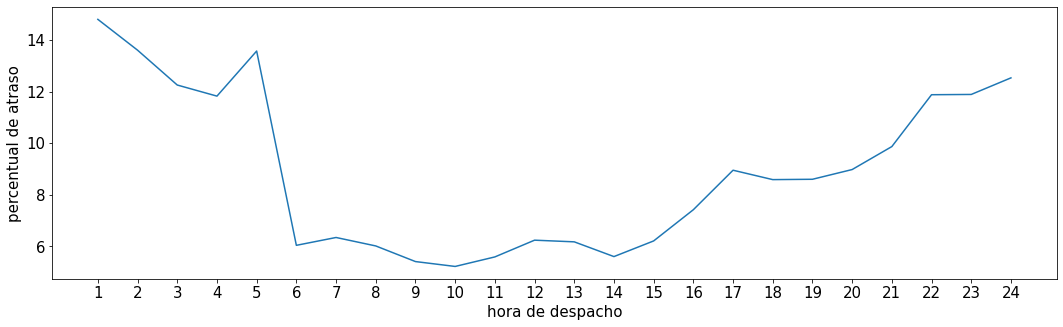

In [132]:
percent_atraso_hora_despachado.plot(x='hora de despacho', y='percentual de atraso', legend=False)
plt.xticks(percent_atraso_hora_despachado['hora de despacho'])
plt.ylabel('percentual de atraso')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Aparentemente, os horários de despacho que com as menores proporção de atrasos na entrega final para o cliente são 9h, 10h e 11h da manhã. Vamos verificar em quais horários os vendedores do Olist mais estão despachando produtos.</p>

Text(0.5, 1.0, 'Produtos despachados à transportadora x horário de despacho')

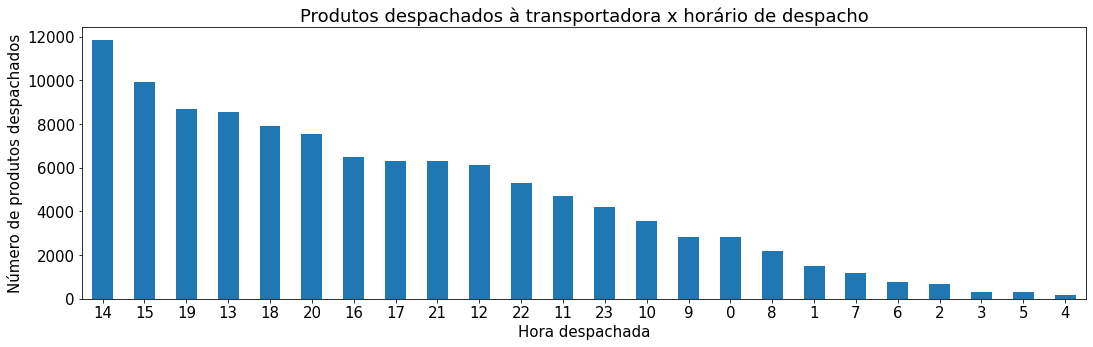

In [133]:
entregas['horario_despachado'].value_counts().plot(kind='bar', rot=0)
plt.ylabel('Número de produtos despachados')
plt.xlabel('Hora despachada')
plt.title('Produtos despachados à transportadora x horário de despacho')

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Os vendedores do Olist têm despachado a maior parte dos produtos às 14h, 15h e 19h, horários que não são os de melhores performances para entrega sem atraso. É provável que haja uma redução dos atrasos que existem hoje se os vendedores forem orientados a fazer entregas à transportadora/correios nos horários de 9h, 10h e 11h. Mas é preciso testar essa hipótese.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Temos como hipótese que 9h, 10h e 11h serão horários melhores do que 14h, 15h e 19h para despachar produtos. Vamos usar uma estatística de teste para essa hipótese.</p>

In [134]:
grupo_a = entregas[(entregas['dif_entregaest_x_efetiva'] < 0) & ((entregas['horario_despachado'] == 14) | (entregas['horario_despachado'] == 15) | (entregas['horario_despachado'] == 19))]

In [135]:
grupo_b = entregas[(entregas['dif_entregaest_x_efetiva'] < 0) & ((entregas['horario_despachado'] == 9) | (entregas['horario_despachado'] == 10) | (entregas['horario_despachado'] == 11))]

In [136]:
xa = grupo_a['dif_entregaest_x_efetiva'].mean()

In [137]:
xb = grupo_b['dif_entregaest_x_efetiva'].mean()

In [138]:
estatistica_teste = xb-xa

In [139]:
estatistica_teste

0.24189527612717576

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">A hipótese já estaria anulada se a diferença entre as médias do grupo A (entregas às 14) e do grupo B (entregas às 10) fosse igual a zero. Há realmente uma diferença matemática entre os dois grupos, mas agora vamos verificar se isso não se deve ao acaso, calculando Estatística de Teste e o Nível de Significância, representado no p-value, que deverá resultar num número abaixo de 0.5 para confirmar nossa hipótese.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos precisar criar um grande grupo com uma fatia do dataset, incluindo os valores de diferença da entrega estimada x efetiva dos produtos despachados 14h e dos despachados às 10.</p>

In [140]:
dois_grupos = pd.concat([grupo_a, grupo_b], ignore_index=True)

In [141]:
dois_grupos['horario_despachado'].unique()

array([14, 15, 19, 11, 10,  9], dtype=int64)

In [142]:
todosgrupos = dois_grupos['dif_entregaest_x_efetiva'].to_list()

In [143]:
media_dif = []

for i in range(1000):
    grupo_a = []
    grupo_b = []
    for valor in todosgrupos:
        grupo = np.random.rand()
        if grupo >= 0.5:
            grupo_a.append(valor)
        else:
            grupo_b.append(valor)
    
    media_a = np.mean(grupo_a)
    media_b = np.mean(grupo_b)
    diferenca_media = media_b = media_a
    media_dif.append(diferenca_media)

In [144]:
sampling_dist = {}

for value in media_dif:
    if sampling_dist.get(value, False):
        newval = sampling_dist.get(value)
        newval += 1
    else:
        sampling_dist[value] = 1

In [145]:
freqs = []

for key in sampling_dist:
    if key >= estatistica_teste:
        freqs.append(key)

p_value = sum(freqs)
p_value /= 1000

In [146]:
p_value

0.0

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Com p_value igual a 0.0, podemos dizer que é estatisticamente relevante a diferença de resultado nos atrasos de entregas entre os grupos A e B, não sendo essas diferenças dadas ao acaso. Ou seja, a hipótese tem força estatística.</p>

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;"> Há uma boa oportunidade para reduzir a quantidade de entregas atrasadas, simplesmente trocando os horários mais frequentes de despacho de mercadorias à transportadora. No intervalo em que esses dados foram gerados os vendedores do Olist utilizavam mais os horários de 14h, 15h e 19h para enviar a maior parte das mercadorias, mas poderiam ter tido menos atrasos se utilizassem os horários de 9h, 10h e 11h.

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora removeremos as variáveis criadas para este requisito, visando aliviar a memória usada.</p>

In [147]:
del percent_atraso_hora_despachado
del entregas
del todosgrupos
del dois_grupos
del grupo_a
del grupo_b
del media_dif
del sampling_dist

-----------------------------------------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Verificar diferenças no padrão de consumo por regiões</h1>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Neste requisito faremos uma análise cruzando os dados relacionados a produtos com a localização dos clientes. O intuito será descobrir padrões de comportamento nos clientes e segmentá-los pelas regiões do Brasil: Sudeste, Sul, Nordeste, Norte e Centro-Oeste.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Abaixo, carregamos o dataset de clientes e fazemos as fusões necessárias para que ele tenha informações de produtos e vendedores.</p>

In [148]:
customers = customers[['customer_id', 'customer_state']]

In [149]:
produtos = products.merge(order_items, on='product_id')
produtos = produtos.drop(columns=['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'order_item_id', 'shipping_limit_date'])
produtos = produtos.merge(sellers, on='seller_id', how='inner')
customers = customers.merge(orders, on='customer_id', how='inner')
customers = customers.merge(produtos, on='order_id', how='inner')

In [150]:
customers

customer_id customer_state  \
0       06b8999e2fba1a1fbc88172c00ba8bc7             SP   
1       18955e83d337fd6b2def6b18a428ac77             SP   
2       4e7b3e00288586ebd08712fdd0374a03             SP   
3       b2b6027bc5c5109e529d4dc6358b12c3             SP   
4       4f2d8ab171c80ec8364f7c12e35b23ad             SP   
...                                  ...            ...   
112645  17ddf5dd5d51696bb3d7c6291687be6f             SP   
112646  e7b71a9017aa05c9a7fd292d714858e8             SP   
112647  5e28dfe12db7fb50a4b2f691faecea5e             CE   
112648  56b18e2166679b8a959d72dd06da27f9             RS   
112649  274fa6071e5e17fe303b9748641082c8             SP   

                                order_id order_status  \
0       00e7ee1b050b8499577073aeb2a297a1    delivered   
1       29150127e6685892b6eab3eec79f59c7    delivered   
2       b2059ed67ce144a36e2aa97d2c9e9ad2    delivered   
3       951670f92359f4fe4a63112aa7306eba    delivered   
4       6b7d50bd145f6fc7f33cebabd7e49d0f    delivered   
...                                  ...          ...   
112645  6760e20addcf0121e9d58f2f1ff14298    delivered   
112646  9ec0c8947d973db4f4e8dcf1fbfa8f1b    delivered   
112647  fed4434add09a6f332ea398efd656a5c    delivered   
112648  e31ec91cea1ecf97797787471f98a8c2    delivered   
112649  28db69209a75e59f20ccbb5c36a20b90    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2017-05-16 15:05:35  2017-05-16 15:22:12   
1           2018-01-12 20:48:24  2018-01-12 20:58:32   
2           2018-05-19 16:07:45  2018-05-20 16:19:10   
3           2018-03-13 16:06:38  2018-03-13 17:29:19   
4           2018-07-29 09:51:30  2018-07-29 10:10:09   
...                         ...                  ...   
112645      2018-04-07 15:48:17  2018-04-07 16:08:45   
112646      2018-04-04 08:20:22  2018-04-04 08:35:12   
112647      2018-04-08 20:11:50  2018-04-08 20:30:03   
112648      2017-11-03 21:08:33  2017-11-03 21:31:20   
112649      2017-12-19 14:27:23  2017-12-19 18:50:39   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-05-23 10:47:57           2017-05-25 10:35:35   
1               2018-01-15 17:14:59           2018-01-29 12:41:19   
2               2018-06-11 14:31:00           2018-06-14 17:58:51   
3               2018-03-27 23:22:42           2018-03-28 16:04:25   
4               2018-07-30 15:16:00           2018-08-09 20:55:48   
...                             ...                           ...   
112645          2018-04-11 02:08:36           2018-04-13 20:06:37   
112646          2018-04-05 18:42:35           2018-04-11 18:54:45   
112647          2018-04-09 17:52:17           2018-05-09 19:03:15   
112648          2017-11-06 18:24:41           2017-11-16 19:58:39   
112649          2017-12-21 19:17:21           2017-12-26 18:42:36   

       order_estimated_delivery_date                        product_id  \
0                2017-06-05 00:00:00  a9516a079e37a9c9c36b9b78b10169e8   
1                2018-02-06 00:00:00  4aa6014eceb682077f9dc4bffebc05b0   
2                2018-06-13 00:00:00  bd07b66896d6f1494f5b86251848ced7   
3                2018-04-10 00:00:00  a5647c44af977b148e0a3a4751a09e2e   
4                2018-08-15 00:00:00  9391a573abe00141c56e38d84d7d5b3b   
...                              ...                               ...   
112645           2018-04-25 00:00:00  ccb4503d9d43d245d3b295d0544f988b   
112646           2018-04-20 00:00:00  9ede6b0570a75a4b9de4f383329f99ee   
112647           2018-05-02 00:00:00  7a5d2e1e131a860ae7d18f6fffa9d689   
112648           2017-12-05 00:00:00  f819f0c84a64f02d3a5606ca95edd272   
112649           2018-01-08 00:00:00  017692475c1c954ff597feda05131d73   

         product_category_name  product_name_lenght  \
0            moveis_escritorio                 41.0   
1        utilidades_domesticas                 43.0   
2            moveis_escritorio                 55.0   
3            moveis_escr

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Para facilitar o nosso trabalho, criaremos uma nova coluna, de nome "regiao", e as populamos com as condicionais para os estados.</p>

In [151]:
sul = customers[(customers['customer_state'] == 'PR') | (customers['customer_state'] == 'SC') | (customers['customer_state'] == 'RS')]
sudeste = customers[(customers['customer_state'] == 'SP') | (customers['customer_state'] == 'MG') | (customers['customer_state'] == 'RJ') | (customers['customer_state'] == 'ES')]
nordeste = customers[(customers['customer_state'] == 'AL') | (customers['customer_state'] == 'BA') | (customers['customer_state'] == 'CE') | (customers['customer_state'] == 'MA') | (customers['customer_state'] == 'PB') | (customers['customer_state'] == 'PE') | (customers['customer_state'] == 'PI') | (customers['customer_state'] == 'RN') | (customers['customer_state'] == 'SE')]
centro_oeste = customers[(customers['customer_state'] == 'GO') | (customers['customer_state'] == 'MT') | (customers['customer_state'] == 'MS')]
norte = customers[(customers['customer_state'] == 'AC') | (customers['customer_state'] == 'AP') | (customers['customer_state'] == 'AM') | (customers['customer_state'] == 'PA') | (customers['customer_state'] == 'RO') | (customers['customer_state'] == 'RR') | (customers['customer_state'] == 'TO')]

In [152]:
customers.loc[(customers['customer_state'] == 'PR') | (customers['customer_state'] == 'SC') | (customers['customer_state'] == 'RS'), 'regiao'] = 'sul'
customers.loc[(customers['customer_state'] == 'SP') | (customers['customer_state'] == 'MG') | (customers['customer_state'] == 'RJ') | (customers['customer_state'] == 'ES'), 'regiao'] = 'sudeste'
customers.loc[(customers['customer_state'] == 'AL') | (customers['customer_state'] == 'BA') | (customers['customer_state'] == 'CE') | (customers['customer_state'] == 'MA') | (customers['customer_state'] == 'PB') | (customers['customer_state'] == 'PE') | (customers['customer_state'] == 'PI') | (customers['customer_state'] == 'RN') | (customers['customer_state'] == 'SE'), 'regiao'] = 'nordeste'
customers.loc[(customers['customer_state'] == 'GO') | (customers['customer_state'] == 'MT') | (customers['customer_state'] == 'MS'), 'regiao'] = 'centro-oeste'
customers.loc[(customers['customer_state'] == 'AC') | (customers['customer_state'] == 'AP') | (customers['customer_state'] == 'AM') | (customers['customer_state'] == 'PA') | (customers['customer_state'] == 'RO') | (customers['customer_state'] == 'RR') | (customers['customer_state'] == 'TO'), 'regiao'] = 'norte'


<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Criada a nova coluna, agora poderemos avaliar que tipos de produtos as regiões mais consomem.</p>

In [153]:
customers[customers['regiao'] == 'sul']['product_category_name'].value_counts()

moveis_decoracao                                 1435
cama_mesa_banho                                  1412
esporte_lazer                                    1324
informatica_acessorios                           1194
beleza_saude                                     1170
                                                 ... 
moveis_colchao_e_estofado                           2
fashion_roupa_infanto_juvenil                       2
pc_gamer                                            1
portateis_cozinha_e_preparadores_de_alimentos       1
artes_e_artesanato                                  1
Name: product_category_name, Length: 72, dtype: int64

In [154]:
customers[customers['regiao'] == 'sudeste']['product_category_name'].value_counts()

cama_mesa_banho                                  8435
beleza_saude                                     6519
esporte_lazer                                    5848
moveis_decoracao                                 5715
informatica_acessorios                           5324
                                                 ... 
portateis_cozinha_e_preparadores_de_alimentos      11
cds_dvds_musicais                                   8
la_cuisine                                          8
pc_gamer                                            7
fashion_roupa_infanto_juvenil                       5
Name: product_category_name, Length: 72, dtype: int64

In [155]:
customers[customers['regiao'] == 'nordeste']['product_category_name'].value_counts()

beleza_saude                                     1139
relogios_presentes                                784
esporte_lazer                                     761
informatica_acessorios                            730
telefonia                                         689
                                                 ... 
cds_dvds_musicais                                   1
moveis_colchao_e_estofado                           1
portateis_cozinha_e_preparadores_de_alimentos       1
fashion_roupa_infanto_juvenil                       1
casa_conforto_2                                     1
Name: product_category_name, Length: 70, dtype: int64

In [156]:
customers[customers['regiao'] == 'centro-oeste']['product_category_name'].value_counts()

beleza_saude                                     384
cama_mesa_banho                                  369
esporte_lazer                                    318
moveis_decoracao                                 268
relogios_presentes                               245
                                                ... 
moveis_colchao_e_estofado                          1
portateis_cozinha_e_preparadores_de_alimentos      1
alimentos_bebidas                                  1
musica                                             1
la_cuisine                                         1
Name: product_category_name, Length: 65, dtype: int64

In [157]:
customers[customers['regiao'] == 'norte']['product_category_name'].value_counts()

beleza_saude                          212
informatica_acessorios                174
esporte_lazer                         166
relogios_presentes                    145
telefonia                             145
                                     ... 
construcao_ferramentas_seguranca        1
construcao_ferramentas_ferramentas      1
climatizacao                            1
alimentos_bebidas                       1
musica                                  1
Name: product_category_name, Length: 61, dtype: int64

Abaixo temos um ranking, com as 4 de categorias de produtos mais consumidas em cada região do Brasil.

| | Sul | Sudeste | Nordeste | Norte | Centro Oeste |
|:--|:--:|:--:|:--:|:--:|--:|
| 1º |Móveis e decoracao|Cama, mesa e banho|Beleza e saúde|Beleza e saúde|Beleza e saúde|
| 2º |Cama, mesa e banho|Beleza e saúde|Relógios e presentes|Informática e acessórios|Cama, mesa e banho|
| 3º |Esporte e lazer|Esporte e lazer|Esporte e lazer|Esporte e lazer|Esporte e lazer|
| 4º |Informática e acessórios|Móveis e Decoração|Informática e acessórios|Telefonia|Móveis e Decoração|


<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Verificaremos os gastos totais por região logo abaixo e plotaremos num gráfico de barras.</p>

Text(0.5, 0, '')

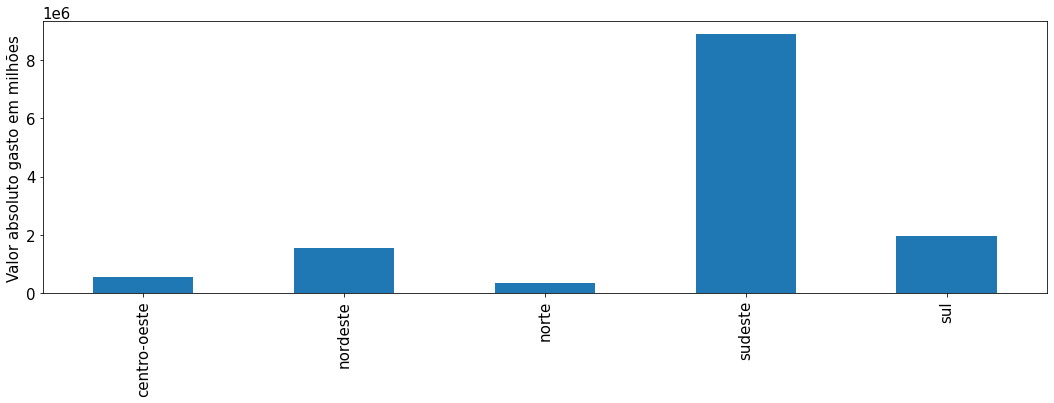

In [158]:
customers.groupby(by='regiao').agg('sum').astype(int)[['price']].plot(kind='bar', legend=False)
plt.ylabel('Valor absoluto gasto em milhões')
plt.xlabel('')

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Conforme já era de se esperar, a região que mais compra em números absolutos é a Sudeste, seguida da Sul. Mas isso apenas não é tão interessante.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos verificar agora o gasto médio por região em um gráfico.</p>

Text(0, 0.5, 'Gasto médio por compra em Reais')

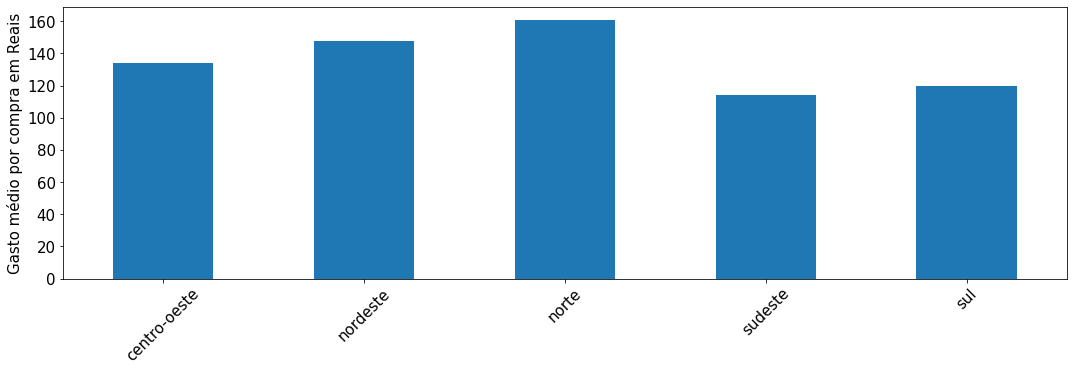

In [159]:
customers.groupby(by='regiao').agg('mean').astype(int)[['price']].plot(kind='bar', legend=False, rot=45)
plt.xlabel('')
plt.ylabel('Gasto médio por compra em Reais')

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">De forma bastante interessante, observamos que os públicos das regiões Norte e Nordeste são os que mais gastam na média.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos utilizar um boxplot para comparar lado a lado os gastos das regiões, conhecendo a distribuição desses valores de uma maneira mais visual</p>

Text(0.5, 0, '')

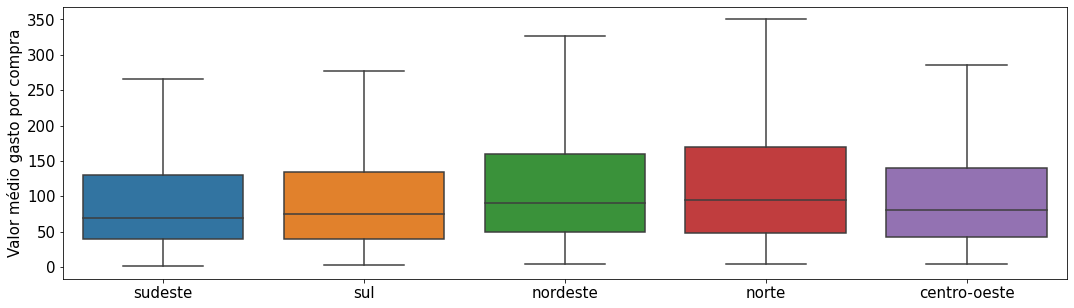

In [160]:
b = sns.boxplot(showfliers=False, data = customers[['price', 'regiao']],
                x = 'regiao',
                y = 'price',
                order = ['sudeste', # custom order of boxplots
                         'sul',
                         'nordeste',
                         'norte',
                         'centro-oeste'])
plt.ylabel('Valor médio gasto por compra')
plt.xlabel('')

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Com o boxplot é possível ter uma ideial mais visual de como estão os gastos e suas distribuições. Em comparação com outras regiões, Norte e Nordeste têm gasto mínimo maior do que as outras, também têm média de gasto maior, e o volume de gastos destas duas está concentrado numa área de maior valor.</p>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Temos uma hipótese para esta observação. Talvez os moradores das regiões norte e nordeste gastem mais por compra porque precisam aproveitar melhor o frete, já que ele pode ser mais caro? Vamos ver quanto gasta cada região em frete para entender melhor.</p>

Text(0.5, 0, '')

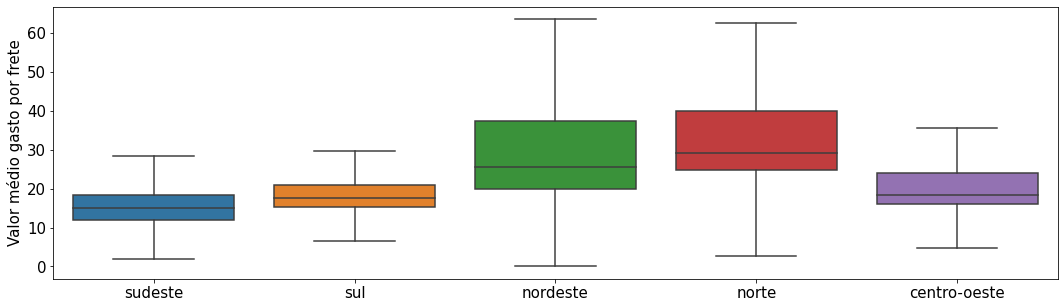

In [161]:
b = sns.boxplot(showfliers=False, data = customers,
                x = 'regiao',
                y = 'freight_value',
                order = ['sudeste', # custom order of boxplots
                         'sul',
                         'nordeste',
                         'norte',
                         'centro-oeste'])
plt.ylabel('Valor médio gasto por frete')
plt.xlabel('')

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">De fato, as regiões Norte e Nordeste têm gasto consideralmente mais em frete do que outras regiões.</p>

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;"> Neste requisito pudemos analisar as categorias de produtos que as regiões mais consomem, e também observamos que moradores das regiões norte e nordeste, apesar de na soma geral gastarem menos que Sul e Sudeste, tendem a gastar mais por compra e mais no frete. Fica um ponto de atenção: este público está disposto a gastar mais, e talvez isso possa ser uma oportunidade para o Olist.</p> 

In [162]:
del b
del customers

-----------------------------------------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Levantar as categorias de produtos mais propensas <br>à insatisfação do cliente</h1>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Para este requisito vamos cruzar dados de produtos, de reviews e de clientes, visando obter informações sobre a satisfação desses.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Iniciamos o trabalho neste requisito fundindo os datasets "customers", "order_reviews" e "products".</p>

In [163]:
order_reviews = order_reviews.merge(orders, on='order_id', how='inner')

In [164]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   review_id                      100000 non-null  object
 1   order_id                       100000 non-null  object
 2   review_score                   100000 non-null  int64 
 3   review_comment_title           11715 non-null   object
 4   review_comment_message         41754 non-null   object
 5   review_creation_date           99991 non-null   object
 6   review_answer_timestamp        100000 non-null  object
 7   customer_id                    100000 non-null  object
 8   order_status                   100000 non-null  object
 9   order_purchase_timestamp       100000 non-null  object
 10  order_approved_at              99839 non-null   object
 11  order_delivered_carrier_date   98207 non-null   object
 12  order_delivered_customer_date  97013 non-null

In [165]:
order_reviews = order_reviews.merge(order_items, on='order_id', how='inner')

In [166]:
order_reviews = order_reviews.merge(products, on='product_id', how='inner')

In [167]:
order_reviews

review_id                          order_id  \
0       7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1       7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
2       e2655da8bccce2ddc2f43cc2c80d24f3  19721d59a9764437477eff0730b48665   
3       cb18f53b563f0bdeb76be0376ddd6b6a  efd626e6a12a82d76e456e34093f8356   
4       80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
...                                  ...                               ...   
113317  7047578adefcc7c27319e3cf91ba1416  01da5549f136167573c8a302f008557a   
113318  7e42a39bc8cf4d1eb5897cb48c2889f7  287445be3e2a5f0d3f5036b2a778d1c5   
113319  586e77c5f02b95285a939083359f8241  5f4a120717a4d152577d7d2ec66c45be   
113320  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
113321  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   

        review_score review_comment_title  \
0                  4                  NaN   
1                  4                  NaN   
2                  5                  NaN   
3                  5                  NaN   
4                  5                  NaN   
...              ...                  ...   
113317             5                  NaN   
113318             5                  NaN   
113319             5                  NaN   
113320             5                  NaN   
113321             1                  NaN   

                                   review_comment_message  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
113317  Produto original,prazo de entrega rápido.Super...   
113318                                                NaN   
113319                                                NaN   
113320                                                NaN   
113321  Solicitei a compra de uma capa de retrovisor c...   

       review_creation_date review_answer_timestamp  \
0       2018-01-18 00:00:00     2018-01-18 21:46:59   
1       2018-01-18 00:00:00     2018-01-18 21:46:59   
2       2018-04-10 00:00:00     2018-04-11 11:30:43   
3       2017-12-28 00:00:00     2017-12-30 12:07:50   
4       2018-03-10 00:00:00     2018-03-11 03:05:13   
...                     ...                     ...   
113317  2018-04-18 00:00:00     2018-04-22 14:48:57   
113318  2018-05-23 00:00:00     2018-05-23 20:40:29   
113319  2018-08-05 00:00:00     2018-08-06 09:48:41   
113320  2018-07-07 00:00:00     2018-07-14 17:18:30   
113321  2017-12-15 00:00:00     2017-12-16 01:29:43   

                             customer_id order_status  \
0       41dcb106f807e993532d446263290104    delivered   
1       41dcb106f807e993532d446263290104    delivered   
2       b1757da2a461d581e1a3b280ca181b7c    delivered   
3       da2bd16b131bc90653b87fe4d8fd266e    delivered   
4       8a2e7ef9053dea531e4dc76bd6d853e6    delivered   
...                                  ...          ...   
113317  c6905c5022f61e99e31ded5f939e702b    delivered   
113318  d86567cdc776774d6de508880d117fdd    delivered   
113319  bfa946d6497267cfd3bf8cb0217f6a5b    delivered   
113320  d8c466a3e7c4cda36cd4ae7d577f44f4    delivered   
113321  8df587ce8a11ee97b3de9ef3405245c2    delivered   

       order_purchase_timestamp  ...   price freight_value  \
0           2018-01-11 15:30:49  ...  185.00         13.63   
1           2018-01-11 15:30:49  ...  185.00         13.63   
2           2018-03-26 11:02:31  ...  185.00         20.26   
3           2017-12-07 20:33:24  ...  185.00         17.05   
4           2018-02-28 12:25:19  ...   79.79          8.30   
...                         ...  ...     ...           ...   
113317      2018-04-08 17:01:55  ...  15

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vamos visualizar o nosso novo dataset, suas colunas, número de linhas etc. Logo abaixo removeremos pedidos duplicados, geradas como resultado das fusões.</p>

In [168]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113322 entries, 0 to 113321
Data columns (total 28 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   review_id                      113322 non-null  object 
 1   order_id                       113322 non-null  object 
 2   review_score                   113322 non-null  int64  
 3   review_comment_title           13622 non-null   object 
 4   review_comment_message         48593 non-null   object 
 5   review_creation_date           113313 non-null  object 
 6   review_answer_timestamp        113322 non-null  object 
 7   customer_id                    113322 non-null  object 
 8   order_status                   113322 non-null  object 
 9   order_purchase_timestamp       113322 non-null  object 
 10  order_approved_at              113307 non-null  object 
 11  order_delivered_carrier_date   112119 non-null  object 
 12  order_delivered_customer_date 

In [169]:
order_reviews.drop_duplicates(subset ="order_id", keep = False, inplace = True) 

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Agora que os três datasets foram fundidos, vamos conhecer as principais reclamações dos clientes insatisfeitos, por meio de nuvens de palavras com o título do review e a mensagem. Vamos considerar um cliente insatisfeito aquele que deixou uma nota 1 ou 2, e assim vamos fatiar o nosso dataset.</p>

In [170]:
insatisfeitos = order_reviews[(order_reviews['review_score'] == 1) | (order_reviews['review_score'] == 2)]

In [171]:
titulos = insatisfeitos['review_comment_title'].str.cat(sep=' ')

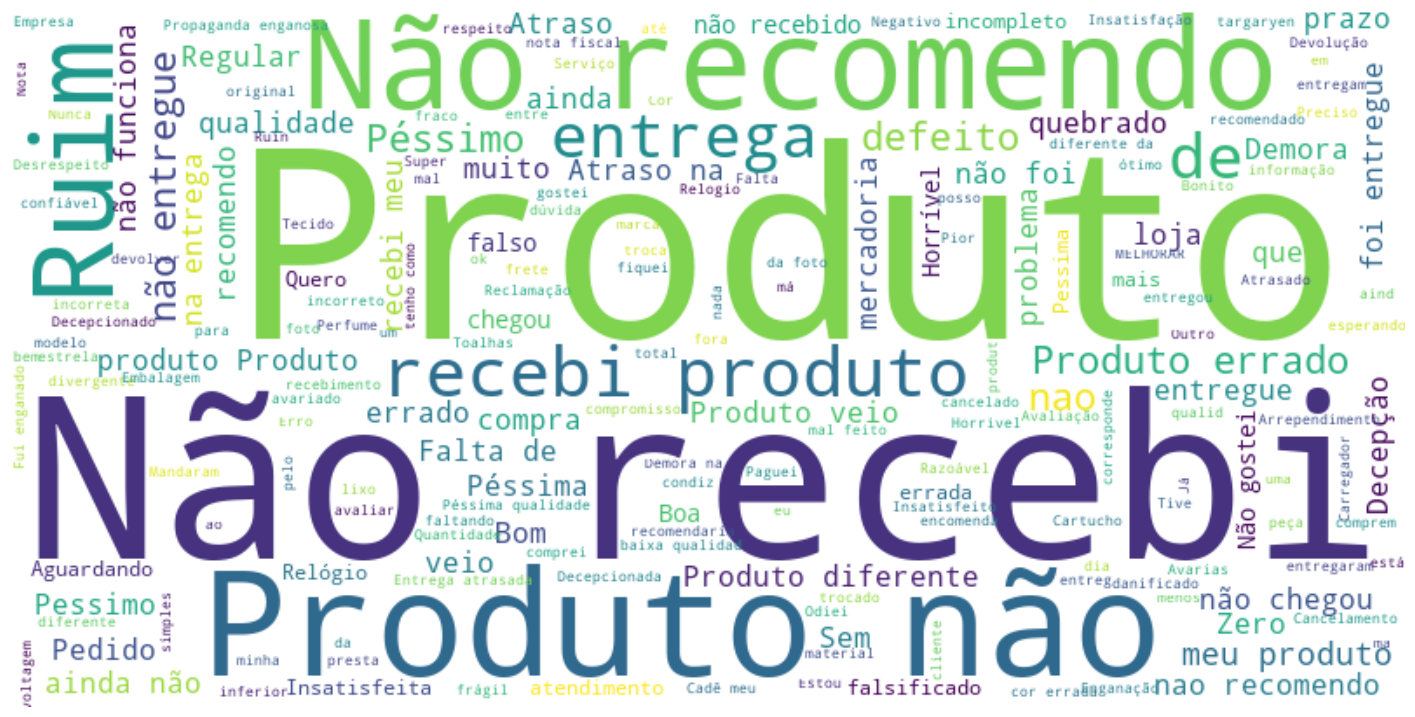

In [172]:
wordcloud = WordCloud(background_color="white", scale=2).generate(titulos)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [173]:
mensagens = insatisfeitos['review_comment_message'].str.cat(sep=' ')

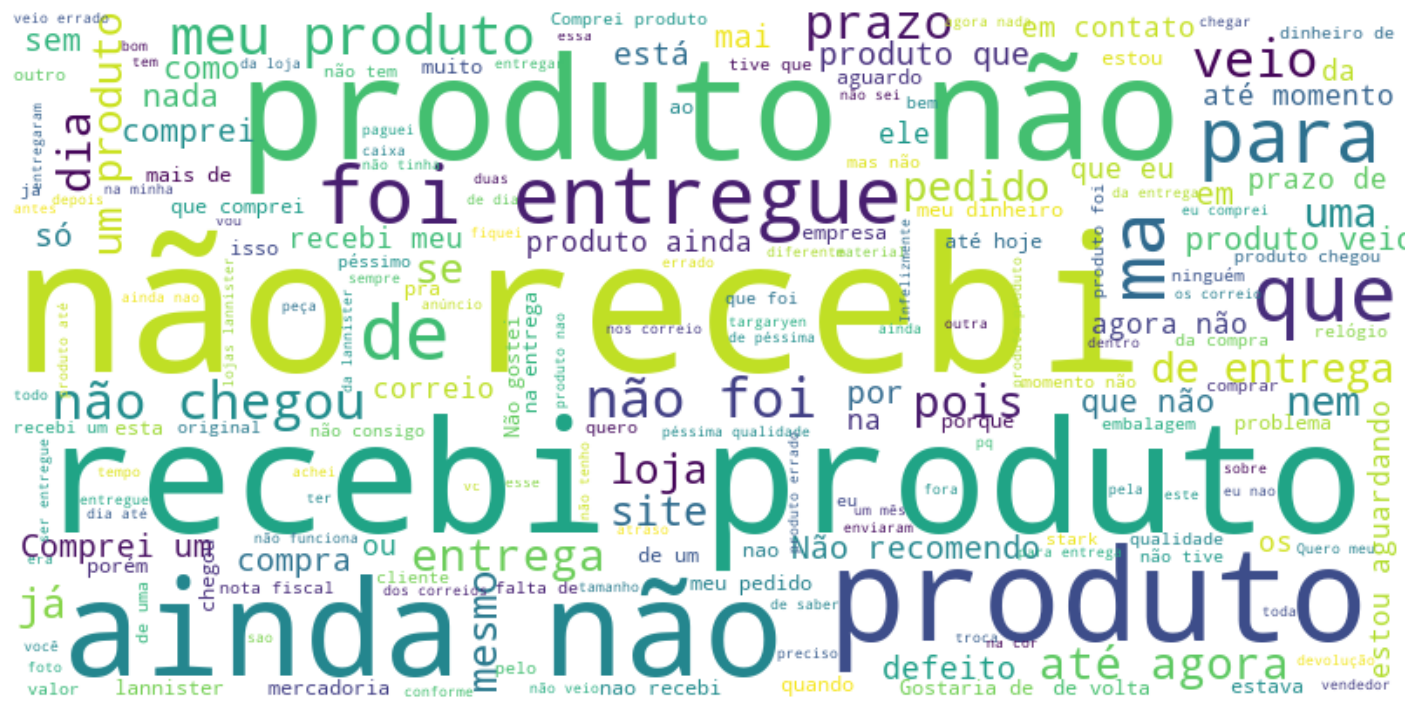

In [174]:
wordcloud = WordCloud(background_color="white", scale=2).generate(mensagens)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Vimos que em sua maioria, os clientes insatisfeitos relataram problemas com a entrega, muitos afirmando que não tinham recebido o produto comprado até então.</p>

In [175]:
len(insatisfeitos)

11541

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Temos 11541 entradas no dataset de insatisfeitos. Vamos conhecer melhor as categorias que mais receberam notas ruins.</p>

In [176]:
insatisfeitos['product_category_name'].value_counts()

cama_mesa_banho                  1160
beleza_saude                      986
informatica_acessorios            846
esporte_lazer                     820
relogios_presentes                771
                                 ... 
artes_e_artesanato                  2
musica                              2
seguros_e_servicos                  1
flores                              1
fashion_roupa_infanto_juvenil       1
Name: product_category_name, Length: 71, dtype: int64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">É interessante perceber que as categorias que mais receberam reclamações também estão entre as mais vendidas, conforme vimos na análise de outros requisitos. Vamos verificar as categorias que receberam menos reclamações, no caso, notas maiores que 2.</p>

In [177]:
order_reviews[order_reviews['review_score'] > 2 ]['product_category_name'].value_counts()

beleza_saude                                     7113
cama_mesa_banho                                  6709
esporte_lazer                                    6078
informatica_acessorios                           5005
relogios_presentes                               4540
                                                 ... 
la_cuisine                                         10
portateis_cozinha_e_preparadores_de_alimentos      10
fashion_roupa_infanto_juvenil                       5
pc_gamer                                            4
seguros_e_servicos                                  1
Name: product_category_name, Length: 73, dtype: int64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">São basicamente as mesmas categorias que recebem as piores e as melhores notas. Talvez o problema não seja com a categoria em si, mas com o fornecedor. Vamos verificar então a proporção de insatisfeitos para a que tem provocado maior insatisfação: cama, mesa e banho</p>

In [178]:
len(order_reviews[(order_reviews['product_category_name'] == 'cama_mesa_banho') & (order_reviews['review_score'] <= 2)]) / len(order_reviews[(order_reviews['product_category_name'] == 'cama_mesa_banho') & (order_reviews['review_score'] > 2)])

0.17290207184379192

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Mais de 17% das pessoas que compram cama, mesa e banho ficaram insatisfeitas com o seu pedido. É um ponto de atenção. Vamos verificar a categoria de Beleza e Saúde.</p>

In [179]:
len(order_reviews[(order_reviews['product_category_name'] == 'beleza_saude') & (order_reviews['review_score'] <= 2)]) / len(order_reviews[(order_reviews['product_category_name'] == 'beleza_saude') & (order_reviews['review_score'] > 2)])

0.138619429214115

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">A insatisfação para a segunda categoria também é alta, quase 14%. Vamos conhecer os vendedores que mais geraram reclamações.</p>

In [180]:
insatisfeitos['seller_id'].value_counts()

4a3ca9315b744ce9f8e9374361493884    275
6560211a19b47992c3666cc44a7e94c0    271
cc419e0650a3c5ba77189a1882b7556a    239
7c67e1448b00f6e969d365cea6b010ab    171
ea8482cd71df3c1969d7b9473ff13abc    149
                                   ... 
2a7c6c0b0d5efde2bf75ec1e1cec2d41      1
deaadd805612bf94faaa9fa702516e11      1
d9442042130b7fe579d1295f9f4a248f      1
6750d71153f00fc58829af2a8ef1bcf1      1
80f2cf9abf6b5a0e5c612b5eea6646e6      1
Name: seller_id, Length: 1719, dtype: int64

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Os vendedores de id "4a3ca9315b744ce9f8e9374361493884", "6560211a19b47992c3666cc44a7e94c0" e "cc419e0650a3c5ba77189a1882b7556a" são os que mais receberam reclamações. Conheceremos agora as nuvens de palavras para os reviews que eles receberam.</p>

In [181]:
mensagens = insatisfeitos[insatisfeitos['seller_id'] == '4a3ca9315b744ce9f8e9374361493884']['review_comment_message'].str.cat(sep=' ').replace('de', '').replace('que', '').replace('um', '').replace('produto', '').replace('muito', '').replace('da', '').replace('na', '').replace('para', '').replace('ma', '').replace('meu', '')

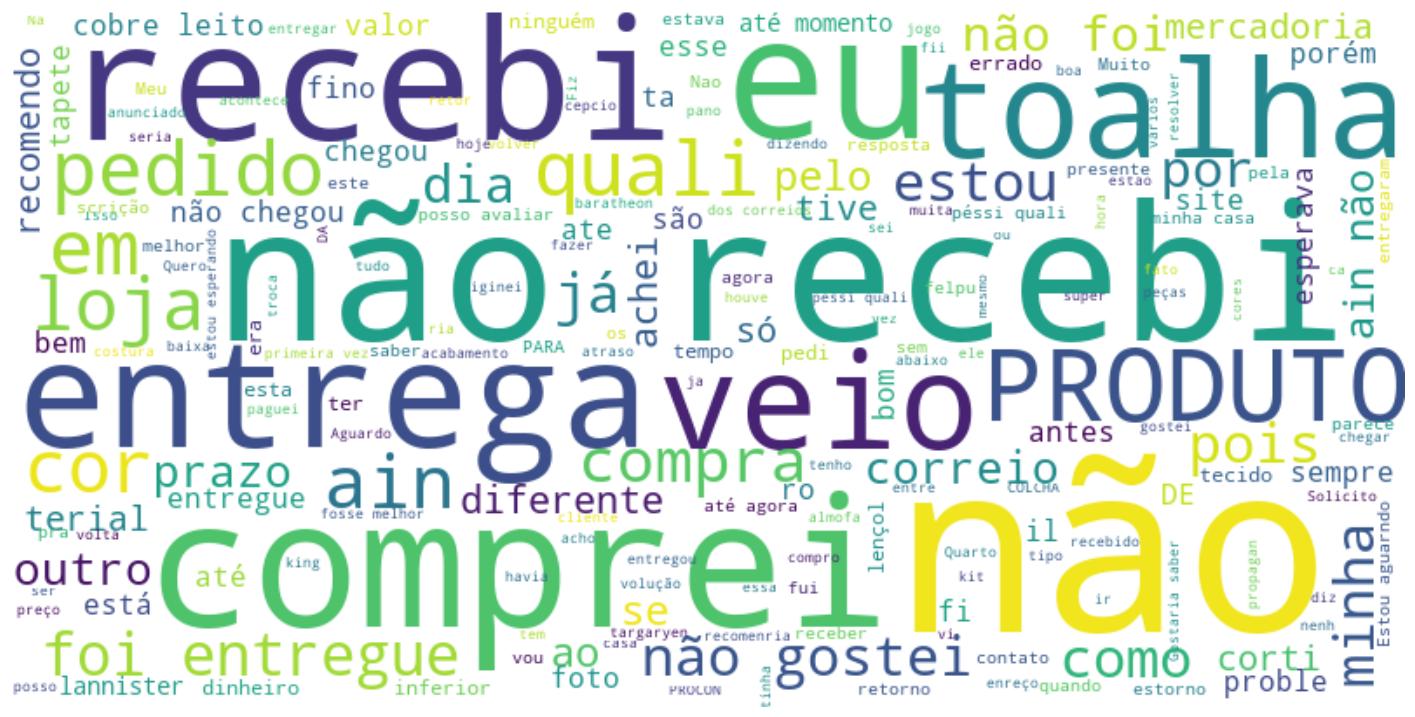

In [182]:
wordcloud = WordCloud(background_color="white", scale=2).generate(mensagens)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">E vendedor de id "4a3ca9315b744ce9f8e9374361493884" está relacionado com produtos de cama mesa e banho (vemos na nuvem palavras como "tapete", "toalha", "costura", "tecido", "lençol", "colcha" e o que parece ser "cortina", mas cortado) e as reclamações estão focadas principalmente na não entrega dos produtos, mas também é considerável que tenham entregue produtos com cores e outras características diferentes das anunciadas. O grande "não" é resultado de frases frequentes de valência negativa.</p>

In [183]:
mensagens = insatisfeitos[insatisfeitos['seller_id'] == '6560211a19b47992c3666cc44a7e94c0']['review_comment_message'].str.cat(sep=' ').replace('de', '').replace('que', '').replace('um', '').replace('produto', '').replace('muito', '').replace('da', '').replace('na', '').replace('para', '').replace('ma', '').replace('meu', '').replace('Produto', '').replace('veio', '').replace('veio', '')

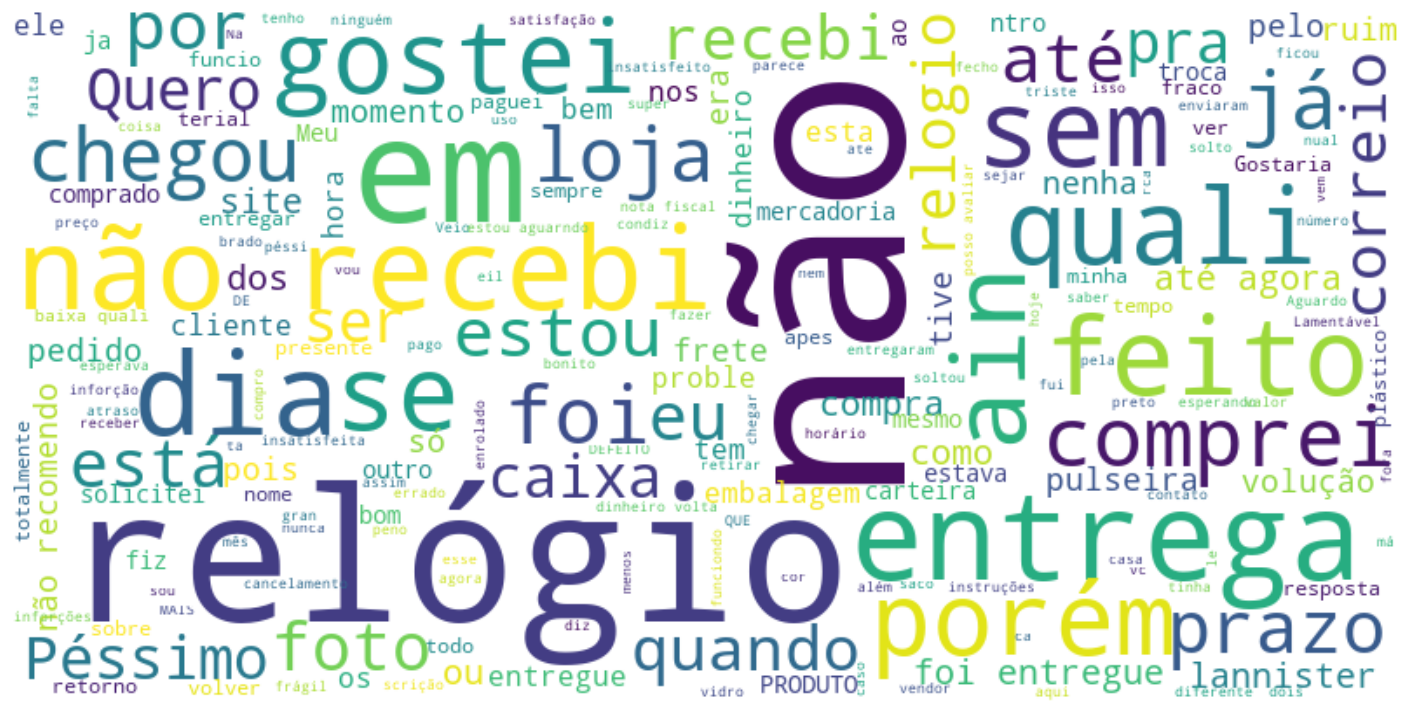

In [184]:
wordcloud = WordCloud(background_color="white", scale=2).generate(mensagens)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">O vendedor de id "6560211a19b47992c3666cc44a7e94c0" está relacionado com relojoaria, tem tido problemas com a entrega, e seus produtos têm apresentado diversos defeitos/problemas, como podemos perceber em "troca", "soltando", "ruim", "Péssimo", "baixa quali", "funciondo", "fraco". Obviamente, o grande "não" é resultado de frases frequentes de valência negativa.</p>

In [185]:
mensagens = insatisfeitos[insatisfeitos['seller_id'] == 'cc419e0650a3c5ba77189a1882b7556a']['review_comment_message'].str.cat(sep=' ').replace('de', '').replace('que', '').replace('um', '').replace('produto', '').replace('muito', '').replace('da', '').replace('na', '').replace('para', '').replace('ma', '').replace('meu', '').replace('Produto', '').replace('veio', '').replace('veio', '')

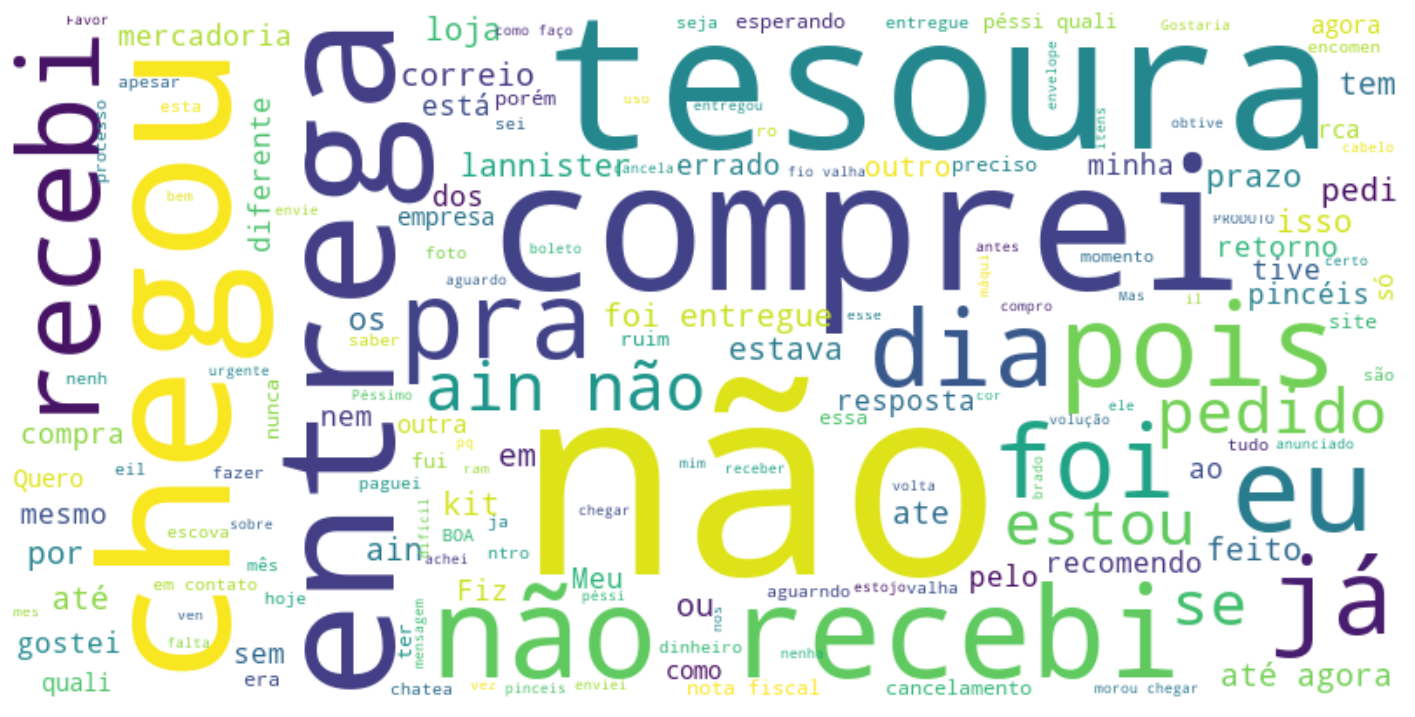

In [186]:
wordcloud = WordCloud(background_color="white", scale=2).generate(mensagens)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">O vendedor de id "cc419e0650a3c5ba77189a1882b7556a" provavelmente está relacionado ao ramo de Saúde e Beleza, pois nos seus comentários aparecem as palavras "tesoura", "pincéis", "escova" e "cabelo". Também tem tido dificuldades com os prazos de entrega e possivelmente também no atendimento ao cliente (nas frases "Quero resposta", "esperando" e na palavra "retorno").</p>

In [187]:
mensagens = insatisfeitos[insatisfeitos['product_category_name'] == 'informatica_acessorios']['review_comment_message'].str.cat(sep=' ').replace('de', '').replace('que', '').replace('um', '').replace('produto', '').replace('muito', '').replace('da', '').replace('na', '').replace('para', '').replace('ma', '').replace('meu', '').replace('Produto', '').replace('veio', '').replace('veio', '')

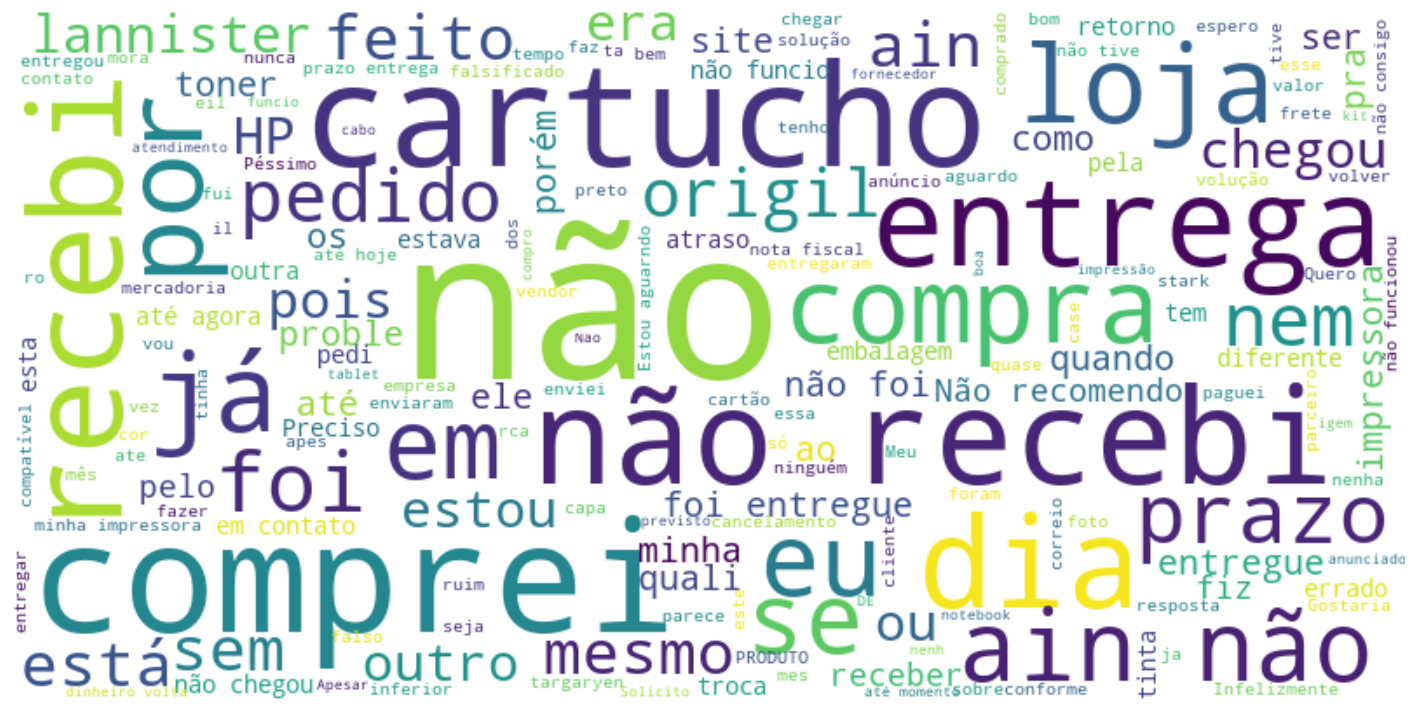

In [188]:
wordcloud = WordCloud(background_color="white", scale=2).generate(mensagens)
plt.figure(figsize=(18, 10), dpi=100)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Analisando agora o segmento de Informática e Acessórios como um todo, as reclamações são muito parecidas com as de outros segmentos, sugerindo um problema com a logística.</p>

<p style="border:1px solid; padding: 10px; background-color: gray; color: white;">Mas é realmente engraçado que nesses comentários tenham aparecido nomes das famílias da série Game of Thrones. Vamos dar uma olhada nisso.</p>

In [189]:
insatisfeitos = insatisfeitos.dropna()

In [190]:
pd.set_option('display.max_colwidth', -1)
insatisfeitos[insatisfeitos['review_comment_message'].str.contains('targaryen')]['review_comment_message']

<ipython-input-190-576b7eb41d6f>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


1562      Desde que comprei vinha tentando cancelar, mas agora que ja recebi, vou ficar com o produto, stark e targaryen, pessimo atendimento, nao possuem sac!!                                                      
5604      É presente pro mor só saberei se veio correto qndo ele pegar comigo.mas a entrega foi péssima os Correios não entregou tive que ir buscar sempre compro site e tdos entregar certo mas por a targaryen nao  
9805      O produto demorou aproximadamente 50 dias para ser entregue. Além disso eles me enviaram um produto de outro modelo, totalmente divergente ao anunciado. FUJAM da parceira targaryen.                       
15573     targaryen não entrega no prazo, total descaso com o cliente!                                                                                                                                                
18161     Olá meu CPF 818.942.526-91 e adquiri pelo site da lannister.com um relógio espião da targaryen pedido de nº 02-670489302 O PRODUTO

In [191]:
insatisfeitos[insatisfeitos['review_comment_message'].str.contains('lannister')]['review_comment_message']

1362      O produto chegou com defeito é o site da lannister é péssimo pra trocas, suporte péssimo !!!!                                                                                                           
3680      Não esperava que as lannister se associasse com empresas que não cumprem com a pontualidade e o compromisso feito. Estou profundamente desapontada.                                                     
7804      Pela segunda vez não recebi o produto comprado na loja lannister.com.\n\n1ª - Um livro "Aves Brasileiras.\n2ª Remédio "Moringa Aleífera.\n\nSolicito providências, caso contrário, tomarei as medidas c 
8778      Cartão Micro SDClasse10Com Adap64GB Sandisk , rec. dif. do anunciado não funciona parece prod. paralelo reportei no site das lannister o ocorrido em 17/05/18 até o momento não tive nenhum retorno     
8791      Produto danificado e não aceita devolução ja estou abrindo reclamação no reclame aqui e se não obtiver resultado abrirei para lannister também .  

In [192]:
insatisfeitos[insatisfeitos['review_comment_message'].str.contains('stark')]['review_comment_message']

1562     Desde que comprei vinha tentando cancelar, mas agora que ja recebi, vou ficar com o produto, stark e targaryen, pessimo atendimento, nao possuem sac!!                                              
3059     Não recebi a mercadoria e não tive retorno do stark. Péssimo suporte.                                                                                                                               
7729     Minha opinião é a mais triste de todas falta compromisso com cliente stark que também não fez nada. Perdeu minha familia como cliente geral.                                                        
8796     Já faz algum tempo que a compra ocorreu e ainda não recebi a mercadoria, trata-se de um descaso com o cliente, já havia realizado outras compras pela stark, mas essa atitude inviabiliza novas aqui
57123    Quero aqui dizer que sou cliente de muito tempo da stark e compro muito...Mais nunca tinha comprado um produto de tão péssima qualidade como esse...Quero aqui dizer qu

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">É, parece que a situação tá complicada para os membros das casas de Westeros.</p>

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;"> Analisando nosso dataset pudemos ver que as categorias de produtos que têm tido mais reclamações são "cama, mesa e banho", "beleza e saúde" e "informatica_acessorios". As reclamações estão relacionadas às entregas e à qualidade dos produtos em si. E as famílias de Westeros estão tendo uma grande dificuldade com logística.</p> 

In [193]:
del insatisfeitos
del order_reviews
del mensagens
pd.set_option('display.max_colwidth', 50)

-----------------------------------------------------------------------------------------

<h1 style="text-align: center; color: #0C29D0;">Defina um modelo para precificar os produtos do nosso catálogo</h1>

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">Para este requisito vamos revisitar os três modelos de precificação mais comuns decidir como seria melhor usá-los, claro, justificando a escolha.</p>

Os modelos de precificação mais comuns na realidade brasileira são:

O **modelo baseado na concorrência**. Tem como maior peso na precificação o benchmarking com os preços do(s) concorrente(s). Para ser funcional, este modelo requer monitoramento permanente dos preços e das ações praticados no mercado.

O **modelo baseado no consumidor**. Se apoia na percepção de valor que o cliente tem de certo produto. Para funcionar, é preciso manter uma iniciativa/ação fixa de captação da opinião dos compradores sobre um ou mais produtos.

O **modelo baseado em custos**. É a abordagem mais conservadora das três. A precificação é mais estável, feita em cima do custo de aquisição por unidade do produto, somado ao lucro desejado, expresso na fórmula: *custo de aquisição + ((percentual de lucro desejado / 100) x custo de aquisição)*

<p style="border:1px solid; padding: 10px; background-color: #f3f9ff; color: #white; border: 0px;">No grande varejo há uma tendência a assumir o <strong>modelo baseado na concorrência</strong>, e essa poderia ser a indicação mais óbvia para o Olist. Mas nós dispomos de ferramentas na Data Science que nos possibilitam praticar um modelo híbrido, ou pelo menos com algumas vantagens de outros, melhorando sua performance.</p>

**Como seria um modelo de precificação "quase híbrido" para os produtos do Olist**
<br>
<br>
O modelo que se sugere toma como ponto de partida a lógica tradicional do varejo (ou seja, sugere-se o **modelo baseado na concorrência**) , sempre utilizando o benchmarking dos valores praticados pela concorrência como norte. Mas este seria apenas o ponto de partida. Abaixo estão descritas algumas ações adicionais (cuja orientação varia entre um modelo e outro) capazes de ajudar a enriquecer a precificação do Olist:
<br>
* Criar um banco de dados e um script de data scraping automatizado, para coletar preços de sites da concorrência em algumas categorias críticas, e fazer um benchmarking mais eficiente. Dessa forma será possível ajustar preços com mais velocidade.
* Manter um monitoramento permanente dos comentários e as notas datas aos produtos, analisar sua valência periodicamente para verificar quais produtos têm maior e menor valor percebido. Com essa medida, mesmo que o Olist assuma o **modelo baseado na concorrência** como o oficial, poderemos fazer ajuste fino no preço de produtos pontuais e ampliar a receita.
* Criar ações de pesquisa de opinião junto ao público comprador, talvez com a oferta de brindes para incetivar a participação. Nessas ações poderia-se coletar informações sobre produtos e também sobre a concorrência, reforçando aspectos do modelo **baseado na concorrência** e do modelo **baseado na demanda**.

<p style="border:1px solid; padding: 10px; background-color: green; color: white; border: 0px;"> Sugerimos o <strong>modelo baseado na concorrência</strong> como o ideal para precificação no Olist, mas "engrossado" com recursos do Data Science que na teoria são pertencentes a outros modelos.</p>

-----------------------------------------------------------------------------------------

<img src="https://images.sympla.com.br/5d7a432087b52.png" />